In [1]:
pip install -U vnstock

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install ta

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install keras-self-attention

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import pandas as pd
from ta.momentum import RSIIndicator
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, RNN, concatenate
from tensorflow.keras.optimizers import RMSprop
from vnstock import *
from ta.volatility import BollingerBands
from tensorflow.keras.layers import Layer
import tensorflow as tf
from keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, Flatten, BatchNormalization
from sklearn.model_selection import RandomizedSearchCV
# from scikeras.wrappers import KerasClassifier

from ta.momentum import StochasticOscillator
from ta.volume import OnBalanceVolumeIndicator
from ta.trend import CCIIndicator
from sklearn.preprocessing import StandardScaler
from ta.volume import ChaikinMoneyFlowIndicator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras import regularizers
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.saving import register_keras_serializable
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from vnstock import *
import pandas as pd
import os
from collections import Counter
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
import optuna
import joblib
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    f1_score, accuracy_score, classification_report, roc_auc_score,
    roc_curve, auc, make_scorer
)
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.metrics import precision_score, recall_score
import shap

Phiên bản Vnai 2.1.9 đã có mặt, vui lòng cập nhật với câu lệnh : `pip install vnai --upgrade`.
Lịch sử phiên bản: https://pypi.org/project/vnai/#history
Phiên bản hiện tại 2.0.4

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [9]:
def dataframe_to_x_y(df, feature, target):
  X_train, y_train = [], []
  X_val, y_val = [], []
  n = len(df)
  split_index = int(n * 0.8)
  X_train = df[feature][:split_index]
  y_train = df[target][:split_index]
  X_val = df[feature][split_index:]
  y_val = df[target][split_index:]
  return X_train, y_train, X_val, y_val

In [10]:

sentiment_columns = [
        'Reputation', 'Company Communication', 'Appointment', 'Financial', 'Regulatory',
        'Sales', 'M&A', 'Legal', 'Dividend Policy', 'Risks', 'Rumors', 'Strategy',
        'Options', 'IPO', 'Signal', 'Coverage', 'Fundamentals', 'Insider Activity',
        'Price Action', 'Buyside', 'Technical Analysis', 'Trade', 'Central Banks',
        'Currency', 'Conditions', 'Market', 'Volatility', 'Investor Sentiment', 'Retail Investor Behavior',
        'Speculation', 'Domestic Institutional Behavior', 'Foreign Institutional Behavior', 'Black Swan Event',
    ]

sentiment_p1d_columns = [
        'reputation_p1d', 'company_communication_p1d', 'appointment_p1d', 'financial_p1d', 'regulatory_p1d',
        'sales_p1d', 'm&a_p1d', 'legal_p1d', 'dividend_policy_p1d', 'risks_p1d', 'rumors_p1d', 'strategy_p1d',
        'options_p1d', 'ipo_p1d', 'signal_p1d', 'coverage_p1d', 'fundamentals_p1d', 'insider_activity_p1d',
        'price_action_p1d', 'buyside_p1d', 'technical_analysis_p1d', 'trade_p1d', 'central_banks_p1d',
        'currency_p1d', 'conditions_p1d', 'market_p1d', 'volatility_p1d', 'investor_sentiment_p1d', 'retail_investor_behavior_p1d',
        'speculation_p1d', 'domestic_institutional_behavior_p1d', 'foreign_institutional_behavior_p1d', 'black_swan_event_p1d',
    ]
meta_cols = ['num_sa_news', 'mean_sentiment_norm', 'max_sentiment_norm', 'std_sentiment_score', 'sum_positive_sa', 'sum_negative_sa', 'time_distance_from_sa_to_close_minutes']
meta_p1d_cols = ['num_sa_news_p1d', 'mean_sentiment_norm_p1d', 'max_sentiment_norm_p1d', 'std_sentiment_score_p1d', 'sum_positive_sa_p1d', 'sum_negative_sa_p1d', 'time_distance_from_sa_to_close_minutes_p1d']

sentiment_feature_selected =  sentiment_columns + sentiment_p1d_columns + meta_cols + meta_p1d_cols
ta_features = ['volume_ma','volume_to_volume_ma_ratio','ema_12','ema_26','sma_20','sma_50','roc_5','roc_1','roc_9','%K','%R','cci','obv','macd','signal_line','macd_histogram','rsi','rsi_base_ma','rsi_rsi_base_ma_ratio','bb_bbm','bb_bbh','bb_bbl','bb_bbp','bb_bbh_bb_bbl_ratio','hl_ratio', 'co_ratio', 'price_range', 'sma_ratio_20_50', 'ema_ratio_12_26', 'bb_width', 'bb_position', 'rsi_overbought', 'rsi_oversold', 'rsi_neutral', 'macd_bullish', 'momentum_5', 'momentum_10','log_return','volatility_5d','volatility_10d','volatility_20d','volatility_30d','mean_log_return_5d','mean_log_return_10d','mean_log_return_20d','mean_log_return_30d','sharpe_like_5d','sharpe_like_10d','sharpe_like_20d','sharpe_like_30d','up_streak','pos_log_return_ratio_20d','z_score_5d','z_score_10d','z_score_20d','z_score_30d','annual_return','daily_return','sharpe_ratio',
               'rsi_vn30','rsi_base_ma_vn30','rsi_rsi_base_ma_ratio_vn30','volume_ma_vn30','volume_to_volume_ma_ratio_vn30','bb_bbm_vn30','bb_bbh_vn30','bb_bbl_vn30','bb_bbp_vn30','bb_bbh_bb_bbl_ratio_vn30','roc_1_vn30', 'roc_5_vn30', 'roc_9_vn30','%K_vn30','%R_vn30','cci_vn30','obv_vn30','ema_12_vn30','ema_26_vn30','sma_20_vn30','sma_50_vn30', 'hl_ratio_vn30', 'co_ratio_vn30', 'price_range_vn30', 'sma_ratio_20_50_vn30', 'ema_ratio_12_26_vn30', 'bb_width_vn30', 'bb_position_vn30', 'rsi_overbought_vn30', 'rsi_oversold_vn30', 'rsi_neutral_vn30', 'momentum_5_vn30', 'momentum_10_vn30', 'log_return_vn30','volatility_5d_vn30','volatility_10d_vn30','volatility_20d_vn30','volatility_30d_vn30','mean_log_return_5d_vn30','mean_log_return_10d_vn30','mean_log_return_20d_vn30','mean_log_return_30d_vn30','sharpe_like_5d_vn30','sharpe_like_10d_vn30','sharpe_like_20d_vn30','sharpe_like_30d_vn30','up_streak_vn30','pos_log_return_ratio_20d_vn30','z_score_5d_vn30','z_score_10d_vn30','z_score_20d_vn30','z_score_30d_vn30','annual_return_vn30','daily_return_vn30','sharpe_ratio_vn30',
               'rsi_vni','rsi_base_ma_vni','rsi_rsi_base_ma_ratio_vni','volume_ma_vni','volume_to_volume_ma_ratio_vni','bb_bbm_vni','bb_bbh_vni','bb_bbl_vni','bb_bbp_vni','bb_bbh_bb_bbl_ratio_vni','roc_1_vni', 'roc_5_vni', 'roc_9_vni','%K_vni','%R_vni','cci_vni','obv_vni','ema_12_vni','ema_26_vni','sma_20_vni','sma_50_vni', 'hl_ratio_vni', 'co_ratio_vni', 'price_range_vni', 'sma_ratio_20_50_vni', 'ema_ratio_12_26_vni', 'bb_width_vni', 'bb_position_vni', 'rsi_overbought_vni', 'rsi_oversold_vni', 'rsi_neutral_vni', 'momentum_5_vni', 'momentum_10_vni','log_return_vni','volatility_5d_vni','volatility_10d_vni','volatility_20d_vni','volatility_30d_vni','mean_log_return_5d_vni','mean_log_return_10d_vni','mean_log_return_20d_vni','mean_log_return_30d_vni','sharpe_like_5d_vni','sharpe_like_10d_vni','sharpe_like_20d_vni','sharpe_like_30d_vni','up_streak_vni','pos_log_return_ratio_20d_vni','z_score_5d_vni','z_score_10d_vni','z_score_20d_vni','z_score_30d_vni','annual_return_vni','daily_return_vni','sharpe_ratio_vni']
fa_features = ['p/b_previous_quarter', 'p/b_change_rate','p/b_change_rate_flag','p/e_previous_quarter','p/e_change_rate','p/e_change_rate_flag','p/s_previous_quarter','p/s_change_rate','p/s_change_rate_flag','p/cash_flow_previous_quarter','p/cash_flow_change_rate','p/cash_flow_change_rate_flag','eps_previous_quarter','eps_change_rate', 'eps_change_rate_flag','bvps_previous_quarter','bvps_change_rate', 'bvps_change_rate_flag','roe_previous_quarter','roe_change_rate','roe_change_rate_flag','roa_previous_quarter','roa_change_rate','roa_change_rate_flag','coefficient_p/b','coefficient_p/e','coefficient_p/s','coefficient_p/cash_flow','coefficient_eps','coefficient_bvps','coefficient_roe','coefficient_roa','distance_to_nearest_quarter']
ta_fa_feature_selected = ta_features + fa_features
features = ta_fa_feature_selected + sentiment_feature_selected
target = 'target'
scaler = StandardScaler()

In [11]:
def load_data_for_analysis(tickers, folder_path):

    df_all = []

    for ticker in tickers:
        file_path = os.path.join(folder_path, f"{ticker}.xlsx")
        if os.path.exists(file_path):
            df = pd.read_excel(file_path)
            df["ticker"] = ticker  # thêm cột ticker
            df_all.append(df)
        else:
            print(f"⚠️ Không tìm thấy: {file_path}")

    # Gộp lại thành 1 DataFrame
    df_global = pd.concat(df_all, ignore_index=True)
    print(f"✅ Đã load xong {len(df_global)} dòng dữ liệu từ {len(df_all)} cổ phiếu.")
    return df_global

In [12]:
tickers = ['ACB', 'BCM', 'BID','BVH','CTG','FPT','GAS','GVR','HDB','HPG',
                    'LPB','MBB','MSN','MWG','PLX','SAB','SHB','SSB','SSI','STB',
                    'TCB','TPB','VCB','VHM','VIB','VIC','VJC','VNM','VPB','VRE']
folder_path_train = r"D:\thacsi\TAILIEULUANVAN\code\PredictStock_TA_FA_SA\TA_FA_SA\data\v6\stock_trend\train_data" 
folder_path_test = r"D:\thacsi\TAILIEULUANVAN\code\PredictStock_TA_FA_SA\TA_FA_SA\data\v6\stock_trend\test_data" 
df_global_train = load_data_for_analysis(tickers, folder_path_train)
df_global_test = load_data_for_analysis(tickers, folder_path_test)


✅ Đã load xong 35865 dòng dữ liệu từ 30 cổ phiếu.
✅ Đã load xong 7380 dòng dữ liệu từ 30 cổ phiếu.


In [13]:
def evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, model_dict):
    f1_weighted_scores = []
    f1_micro_scores = []
    f1_macro_scores = []
    acc_scores = []
    auc_micro_scores = []
    auc_weighted_scores = []
    auc_macro_scores = []
    precision_micro_scores = []
    precision_macro_scores = []
    precision_weighted_scores = []
    recall_micro_scores = []
    recall_macro_scores = []
    recall_weighted_scores = []
    model_names = list(model_dict.keys())

    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)
    roc_data = {}

    for name in model_names:
        base_model = model_dict[name]
        model = clone(base_model)

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)

        # F1 Scores
        f1_weighted = f1_score(y_test, y_pred, average='weighted')
        f1_micro = f1_score(y_test, y_pred, average='micro')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        acc = accuracy_score(y_test, y_pred)

        # Precision
        precision_micro = precision_score(y_test, y_pred, average='micro', zero_division=0)
        precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
        precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)

        # Recall
        recall_micro = recall_score(y_test, y_pred, average='micro', zero_division=0)
        recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
        recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)

        print(f"{name} Test F1 (weighted): {f1_weighted:.4f}")
        print(f"{name} Test F1 (micro)   : {f1_micro:.4f}")
        print(f"{name} Test F1 (macro)   : {f1_macro:.4f}")
        print(f"{name} Test Accuracy     : {acc:.4f}")
        print(f"{name} Precision (micro/macro/weighted): {precision_micro:.4f} / {precision_macro:.4f} / {precision_weighted:.4f}")
        print(f"{name} Recall (micro/macro/weighted): {recall_micro:.4f} / {recall_macro:.4f} / {recall_weighted:.4f}")
        print(classification_report(y_test, y_pred))

        try:
            roc_auc_micro = roc_auc_score(y_test_bin, y_proba, average='micro', multi_class='ovr')
            roc_auc_weighted = roc_auc_score(y_test_bin, y_proba, average='weighted', multi_class='ovr')
            roc_auc_macro = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
            print(f"{name} ROC AUC (micro ovr): {roc_auc_micro:.4f}")
            print(f"{name} ROC AUC (weighted ovr): {roc_auc_weighted:.4f}")
            print(f"{name} ROC AUC (macro ovr): {roc_auc_macro:.4f}")
        except ValueError:
            print(f"{name} ROC AUC could not be computed (possibly due to only one class present in y_test)")
            roc_auc_micro = np.nan
            roc_auc_weighted = np.nan
            roc_auc_macro = np.nan

        # Lưu dữ liệu để vẽ
        fpr = {}
        tpr = {}
        roc_auc_class = {}
        for i, cls in enumerate(classes):
            fpr[cls], tpr[cls], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc_class[cls] = auc(fpr[cls], tpr[cls])
        roc_data[name] = {"fpr": fpr, "tpr": tpr, "auc": roc_auc_class}

        # Lưu điểm số
        f1_weighted_scores.append(f1_weighted)
        f1_micro_scores.append(f1_micro)
        f1_macro_scores.append(f1_macro)
        acc_scores.append(acc)
        auc_micro_scores.append(roc_auc_micro)
        auc_weighted_scores.append(roc_auc_weighted)
        auc_macro_scores.append(roc_auc_macro)
        precision_micro_scores.append(precision_micro)
        precision_macro_scores.append(precision_macro)
        precision_weighted_scores.append(precision_weighted)
        recall_micro_scores.append(recall_micro)
        recall_macro_scores.append(recall_macro)
        recall_weighted_scores.append(recall_weighted)

    return (
        model_names,
        f1_weighted_scores,
        f1_micro_scores,
        f1_macro_scores,
        acc_scores,
        auc_micro_scores,
        auc_weighted_scores,
        auc_macro_scores,
        precision_micro_scores,
        precision_macro_scores,
        precision_weighted_scores,
        recall_micro_scores,
        recall_macro_scores,
        recall_weighted_scores,
        roc_data
    )

Evaluate with ta data

In [14]:
# Danh sách các mô hình
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced_subsample'),
    "XGBoost": XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(n_jobs=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Random Forest_optimize": RandomForestClassifier(
        n_jobs=-1,
        random_state=42,
        class_weight='balanced_subsample',
        n_estimators= 452,
        max_depth = 18,
        min_samples_split = 9, 
        min_samples_leaf = 4, 
        max_features = 'log2'
        
    ),
    "XGBoost_optimize": XGBClassifier(
        n_jobs=-1,
        random_state=42, 
        use_label_encoder=False, 
        eval_metric='mlogloss',
        n_estimators = 794,
        max_depth = 12, 
        learning_rate = 0.011137357517182185, 
        subsample = 0.7133408583477188, 
        colsample_bytree = 0.3011380525314675
    ),
    "LightGBM_optimize": LGBMClassifier(
        class_weight = "balanced",
        objective = "multiclass",
        metric = "multi_logloss",
        verbosity = -1,
        random_state = 42,
        n_jobs = -1,
        n_estimators = 397, 
        max_depth = 14, 
        learning_rate = 0.01104166495200954, 
        num_leaves = 44, 
        subsample = 0.7587873213341586, 
        colsample_bytree = 0.6460495528351479, 
        min_child_samples = 71
    ),
    "CatBoost_optimize": CatBoostClassifier(
        verbose=0,
        auto_class_weights = "Balanced",  # giúp giảm mất cân bằng lớp
        loss_function = "MultiClass",
        eval_metric = "MultiClass",
        random_seed = 42,
        iterations = 826,
        depth = 9, 
        learning_rate = 0.017594777674836887, 
        l2_leaf_reg = 6.386083659575023, 
        bagging_temperature = 0.3013688512467678, 
        random_strength = 0.9561176933860838, 
        border_count = 132
    ),
    "AdaBoost_optimize": AdaBoostClassifier(
        random_state=42,
        n_estimators = 104, 
        learning_rate = 0.1319039410614862, 
        algorithm = 'SAMME.R', 
        estimator = DecisionTreeClassifier(max_depth=2, class_weight="balanced"),
    ),
}

In [15]:
X_train_ta = df_global_train[ta_features]
X_test_ta = df_global_test[ta_features]
y_train = df_global_train[target]
y_test = df_global_test[target]

scaler = StandardScaler()
X_train_ta_scaled = scaler.fit_transform(X_train_ta)
X_test_ta_scaled = scaler.transform(X_test_ta)    

In [16]:
print("Đánh giá với bộ feature ta")
  
model_names, \
f1_weighted_scores_no_sa, f1_micro_scores_no_sa, \
f1_macro_scores_no_sa, acc_scores_no_sa, \
auc_micro_scores_no_sa, auc_weighted_scores_no_sa, auc_macro_scores_no_sa, \
precision_micro_scores_no_sa, precision_macro_scores_no_sa, precision_weighted_scores_no_sa, \
recall_micro_scores_no_sa, recall_macro_scores_no_sa, recall_weighted_scores_no_sa, \
roc_data_no_sa = evaluate_models(
    X_train_ta_scaled, X_test_ta_scaled, y_train, y_test, models
)

Đánh giá với bộ feature ta
Random Forest Test F1 (weighted): 0.5085
Random Forest Test F1 (micro)   : 0.6286
Random Forest Test F1 (macro)   : 0.2949
Random Forest Test Accuracy     : 0.6286
Random Forest Precision (micro/macro/weighted): 0.6286 / 0.4248 / 0.5215
Random Forest Recall (micro/macro/weighted): 0.6286 / 0.3466 / 0.6286
              precision    recall  f1-score   support

           0       0.24      0.02      0.03      1302
           1       0.64      0.98      0.77      4656
           2       0.40      0.05      0.08      1422

    accuracy                           0.63      7380
   macro avg       0.42      0.35      0.29      7380
weighted avg       0.52      0.63      0.51      7380

Random Forest ROC AUC (micro ovr): 0.7597
Random Forest ROC AUC (weighted ovr): 0.6039
Random Forest ROC AUC (macro ovr): 0.5910


[21:24:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost Test F1 (weighted): 0.5210
XGBoost Test F1 (micro)   : 0.6153
XGBoost Test F1 (macro)   : 0.3250
XGBoost Test Accuracy     : 0.6153
XGBoost Precision (micro/macro/weighted): 0.6153 / 0.4214 / 0.5205
XGBoost Recall (micro/macro/weighted): 0.6153 / 0.3565 / 0.6153
              precision    recall  f1-score   support

           0       0.32      0.04      0.06      1302
           1       0.64      0.94      0.76      4656
           2       0.30      0.10      0.15      1422

    accuracy                           0.62      7380
   macro avg       0.42      0.36      0.32      7380
weighted avg       0.52      0.62      0.52      7380

XGBoost ROC AUC (micro ovr): 0.7524
XGBoost ROC AUC (weighted ovr): 0.5878
XGBoost ROC AUC (macro ovr): 0.5810
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39131
[LightGBM] [Info] Number of data points 

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost Test F1 (weighted): 0.5191
AdaBoost Test F1 (micro)   : 0.6255
AdaBoost Test F1 (macro)   : 0.3142
AdaBoost Test Accuracy     : 0.6255
AdaBoost Precision (micro/macro/weighted): 0.6255 / 0.4207 / 0.5222
AdaBoost Recall (micro/macro/weighted): 0.6255 / 0.3540 / 0.6255
              precision    recall  f1-score   support

           0       0.27      0.06      0.10      1302
           1       0.65      0.96      0.77      4656
           2       0.34      0.04      0.07      1422

    accuracy                           0.63      7380
   macro avg       0.42      0.35      0.31      7380
weighted avg       0.52      0.63      0.52      7380

AdaBoost ROC AUC (micro ovr): 0.7461
AdaBoost ROC AUC (weighted ovr): 0.5917
AdaBoost ROC AUC (macro ovr): 0.5656
Random Forest_optimize Test F1 (weighted): 0.5358
Random Forest_optimize Test F1 (micro)   : 0.6136
Random Forest_optimize Test F1 (macro)   : 0.3526
Random Forest_optimize Test Accuracy     : 0.6136
Random Forest_optimize Preci

[21:26:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost_optimize Test F1 (weighted): 0.5101
XGBoost_optimize Test F1 (micro)   : 0.6305
XGBoost_optimize Test F1 (macro)   : 0.2967
XGBoost_optimize Test Accuracy     : 0.6305
XGBoost_optimize Precision (micro/macro/weighted): 0.6305 / 0.4569 / 0.5385
XGBoost_optimize Recall (micro/macro/weighted): 0.6305 / 0.3482 / 0.6305
              precision    recall  f1-score   support

           0       0.35      0.01      0.03      1302
           1       0.64      0.98      0.77      4656
           2       0.38      0.05      0.09      1422

    accuracy                           0.63      7380
   macro avg       0.46      0.35      0.30      7380
weighted avg       0.54      0.63      0.51      7380

XGBoost_optimize ROC AUC (micro ovr): 0.7679
XGBoost_optimize ROC AUC (weighted ovr): 0.6203
XGBoost_optimize ROC AUC (macro ovr): 0.6094
LightGBM_optimize Test F1 (weighted): 0.5468
LightGBM_optimize Test F1 (micro)   : 0.5802
LightGBM_optimize Test F1 (macro)   : 0.3937
LightGBM_optimize Tes

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost_optimize Test F1 (weighted): 0.5403
AdaBoost_optimize Test F1 (micro)   : 0.5611
AdaBoost_optimize Test F1 (macro)   : 0.3944
AdaBoost_optimize Test Accuracy     : 0.5611
AdaBoost_optimize Precision (micro/macro/weighted): 0.5611 / 0.4053 / 0.5291
AdaBoost_optimize Recall (micro/macro/weighted): 0.5611 / 0.3963 / 0.5611
              precision    recall  f1-score   support

           0       0.26      0.27      0.26      1302
           1       0.68      0.77      0.72      4656
           2       0.28      0.16      0.20      1422

    accuracy                           0.56      7380
   macro avg       0.41      0.40      0.39      7380
weighted avg       0.53      0.56      0.54      7380

AdaBoost_optimize ROC AUC (micro ovr): 0.7169
AdaBoost_optimize ROC AUC (weighted ovr): 0.6101
AdaBoost_optimize ROC AUC (macro ovr): 0.5916


Evaluate with ta + fa data

In [43]:
# Danh sách các mô hình
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced_subsample'),
    "XGBoost": XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(n_jobs=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Random Forest_optimize": RandomForestClassifier(
        n_jobs=-1,
        random_state=42,
        class_weight='balanced_subsample',
        n_estimators= 452,
        max_depth = 18,
        min_samples_split = 9, 
        min_samples_leaf = 4, 
        max_features = 'log2'
        
    ),
    "XGBoost_optimize": XGBClassifier(
        n_jobs=-1,
        random_state=42, 
        use_label_encoder=False, 
        eval_metric='mlogloss',
        n_estimators = 746,
        max_depth = 12, 
        learning_rate = 0.010426655483340486, 
        subsample = 0.7172335199809252, 
        colsample_bytree = 0.33652334829357333
    ),
    "LightGBM_optimize": LGBMClassifier(
        class_weight = "balanced",
        objective = "multiclass",
        metric = "multi_logloss",
        verbosity = -1,
        random_state = 42,
        n_jobs = -1,
        n_estimators = 397, 
        max_depth = 14, 
        learning_rate = 0.01104166495200954, 
        num_leaves = 44, 
        subsample = 0.7587873213341586, 
        colsample_bytree = 0.6460495528351479, 
        min_child_samples = 71
    ),
    "CatBoost_optimize": CatBoostClassifier(
        verbose=0,
        auto_class_weights = "Balanced",  # giúp giảm mất cân bằng lớp
        loss_function = "MultiClass",
        eval_metric = "MultiClass",
        random_seed = 42,
        iterations = 826,
        depth = 9, 
        learning_rate = 0.017594777674836887, 
        l2_leaf_reg = 6.386083659575023, 
        bagging_temperature = 0.3013688512467678, 
        random_strength = 0.9561176933860838, 
        border_count = 132
    ),
    "AdaBoost_optimize": AdaBoostClassifier(
        random_state=42,
        n_estimators = 104, 
        learning_rate = 0.1319039410614862, 
        algorithm = 'SAMME.R', 
        estimator = DecisionTreeClassifier(max_depth=2, class_weight="balanced"),
    ),
}

In [15]:
X_train_no_sa = df_global_train[ta_fa_feature_selected]
X_test_no_sa = df_global_test[ta_fa_feature_selected]
y_train = df_global_train[target]
y_test = df_global_test[target]

scaler = StandardScaler()
X_train_no_sa_scaled = scaler.fit_transform(X_train_no_sa)
X_test_no_sa_scaled = scaler.transform(X_test_no_sa)    

In [ ]:
print("Đánh giá với bộ feature không có SA (chỉ ta + fa)")
  
model_names, \
f1_weighted_scores_no_sa, f1_micro_scores_no_sa, \
f1_macro_scores_no_sa, acc_scores_no_sa, \
auc_micro_scores_no_sa, auc_weighted_scores_no_sa, auc_macro_scores_no_sa, \
precision_micro_scores_no_sa, precision_macro_scores_no_sa, precision_weighted_scores_no_sa, \
recall_micro_scores_no_sa, recall_macro_scores_no_sa, recall_weighted_scores_no_sa, \
roc_data_no_sa = evaluate_models(
    X_train_no_sa_scaled, X_test_no_sa_scaled, y_train, y_test, models
)

Đánh giá với bộ feature không có SA (chỉ ta + fa)
Random Forest Test F1 (weighted): 0.5118
Random Forest Test F1 (micro)   : 0.6318
Random Forest Test F1 (macro)   : 0.2992
Random Forest Test Accuracy     : 0.6318
Random Forest Precision (micro/macro/weighted): 0.6318 / 0.4657 / 0.5441
Random Forest Recall (micro/macro/weighted): 0.6318 / 0.3497 / 0.6318
              precision    recall  f1-score   support

           0       0.33      0.02      0.03      1302
           1       0.64      0.98      0.77      4656
           2       0.42      0.05      0.09      1422

    accuracy                           0.63      7380
   macro avg       0.47      0.35      0.30      7380
weighted avg       0.54      0.63      0.51      7380

Random Forest ROC AUC (micro ovr): 0.7607
Random Forest ROC AUC (weighted ovr): 0.6060
Random Forest ROC AUC (macro ovr): 0.5926


[19:10:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost Test F1 (weighted): 0.5168
XGBoost Test F1 (micro)   : 0.6115
XGBoost Test F1 (macro)   : 0.3194
XGBoost Test Accuracy     : 0.6115
XGBoost Precision (micro/macro/weighted): 0.6115 / 0.3917 / 0.5041
XGBoost Recall (micro/macro/weighted): 0.6115 / 0.3517 / 0.6115
              precision    recall  f1-score   support

           0       0.23      0.04      0.07      1302
           1       0.64      0.93      0.76      4656
           2       0.30      0.08      0.13      1422

    accuracy                           0.61      7380
   macro avg       0.39      0.35      0.32      7380
weighted avg       0.50      0.61      0.52      7380

XGBoost ROC AUC (micro ovr): 0.7488
XGBoost ROC AUC (weighted ovr): 0.5780
XGBoost ROC AUC (macro ovr): 0.5718
LightGBM Test F1 (weighted): 0.5136
LightGBM Test F1 (micro)   : 0.6260
LightGBM Test F1 (macro)   : 0.3045
LightGBM Test Accuracy     : 0.6260
LightGBM Precision (micro/macro/weighted): 0.6260 / 0.4120 / 0.5153
LightGBM Recall (micro/ma

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost Test F1 (weighted): 0.5183
AdaBoost Test F1 (micro)   : 0.6255
AdaBoost Test F1 (macro)   : 0.3138
AdaBoost Test Accuracy     : 0.6255
AdaBoost Precision (micro/macro/weighted): 0.6255 / 0.4299 / 0.5263
AdaBoost Recall (micro/macro/weighted): 0.6255 / 0.3535 / 0.6255
              precision    recall  f1-score   support

           0       0.26      0.04      0.07      1302
           1       0.64      0.96      0.77      4656
           2       0.38      0.05      0.10      1422

    accuracy                           0.63      7380
   macro avg       0.43      0.35      0.31      7380
weighted avg       0.53      0.63      0.52      7380

AdaBoost ROC AUC (micro ovr): 0.7512
AdaBoost ROC AUC (weighted ovr): 0.5989
AdaBoost ROC AUC (macro ovr): 0.5766
Random Forest_optimize Test F1 (weighted): 0.5352
Random Forest_optimize Test F1 (micro)   : 0.6150
Random Forest_optimize Test F1 (macro)   : 0.3509
Random Forest_optimize Test Accuracy     : 0.6150
Random Forest_optimize Preci

[19:12:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost_optimize Test F1 (weighted): 0.5141
XGBoost_optimize Test F1 (micro)   : 0.6317
XGBoost_optimize Test F1 (macro)   : 0.3036
XGBoost_optimize Test Accuracy     : 0.6317
XGBoost_optimize Precision (micro/macro/weighted): 0.6317 / 0.4759 / 0.5495
XGBoost_optimize Recall (micro/macro/weighted): 0.6317 / 0.3517 / 0.6317
              precision    recall  f1-score   support

           0       0.37      0.02      0.03      1302
           1       0.64      0.98      0.77      4656
           2       0.41      0.06      0.10      1422

    accuracy                           0.63      7380
   macro avg       0.48      0.35      0.30      7380
weighted avg       0.55      0.63      0.51      7380

XGBoost_optimize ROC AUC (micro ovr): 0.7700
XGBoost_optimize ROC AUC (weighted ovr): 0.6224
XGBoost_optimize ROC AUC (macro ovr): 0.6139
LightGBM_optimize Test F1 (weighted): 0.5485
LightGBM_optimize Test F1 (micro)   : 0.5767
LightGBM_optimize Test F1 (macro)   : 0.4015
LightGBM_optimize Tes

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost_optimize Test F1 (weighted): 0.5395
AdaBoost_optimize Test F1 (micro)   : 0.5598
AdaBoost_optimize Test F1 (macro)   : 0.3928
AdaBoost_optimize Test Accuracy     : 0.5598
AdaBoost_optimize Precision (micro/macro/weighted): 0.5598 / 0.4033 / 0.5278
AdaBoost_optimize Recall (micro/macro/weighted): 0.5598 / 0.3933 / 0.5598
              precision    recall  f1-score   support

           0       0.25      0.24      0.24      1302
           1       0.68      0.77      0.72      4656
           2       0.28      0.17      0.21      1422

    accuracy                           0.56      7380
   macro avg       0.40      0.39      0.39      7380
weighted avg       0.53      0.56      0.54      7380

AdaBoost_optimize ROC AUC (micro ovr): 0.7172
AdaBoost_optimize ROC AUC (weighted ovr): 0.6105
AdaBoost_optimize ROC AUC (macro ovr): 0.5923


In [45]:
base_optimize_pairs = [
    ("Random Forest", "Random Forest_optimize"),
    ("XGBoost", "XGBoost_optimize"),
    ("LightGBM", "LightGBM_optimize"),
    ("CatBoost", "CatBoost_optimize"),
    ("AdaBoost", "AdaBoost_optimize"),
]

SO SÁNH GIỮA BASE MODEL VÀ OPTIMIZED MODEL DỰA TRÊN CÁC TIÊU CHÍ TRƯỜNG HỢP KHÔNG CÓ SENTIMENT ANALYSIS

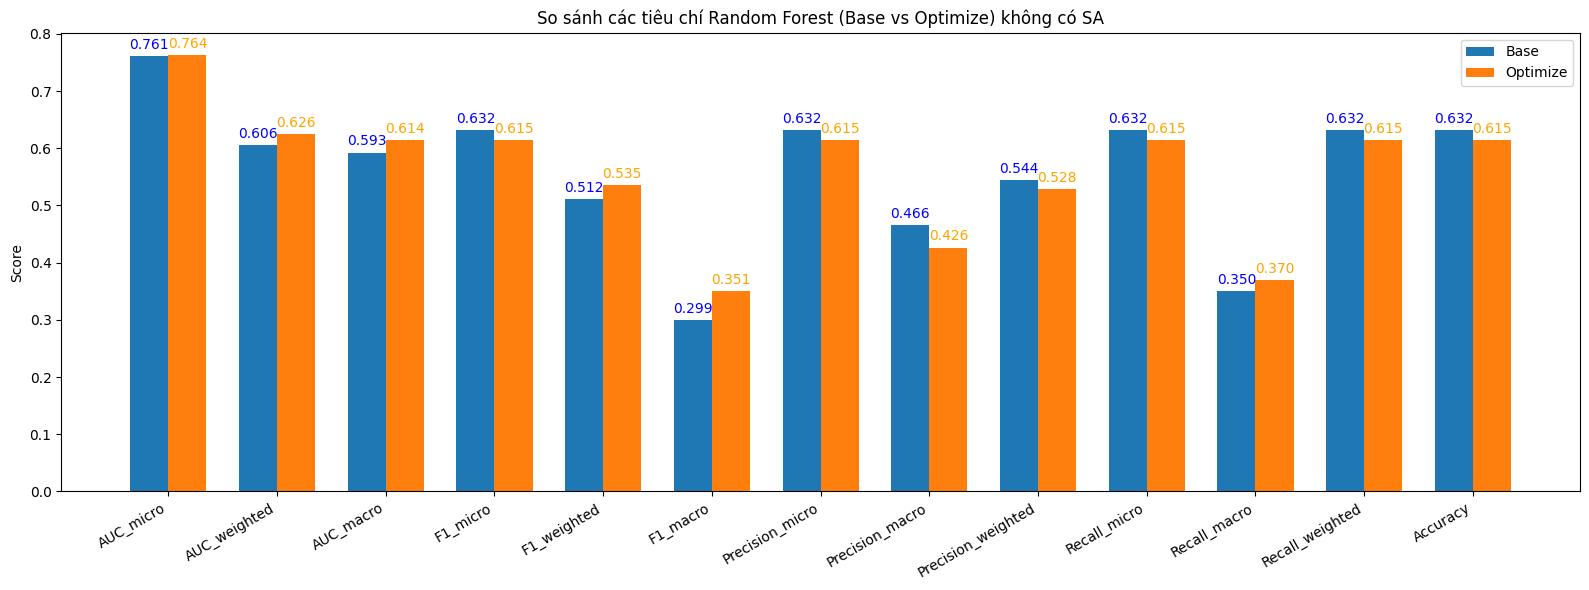

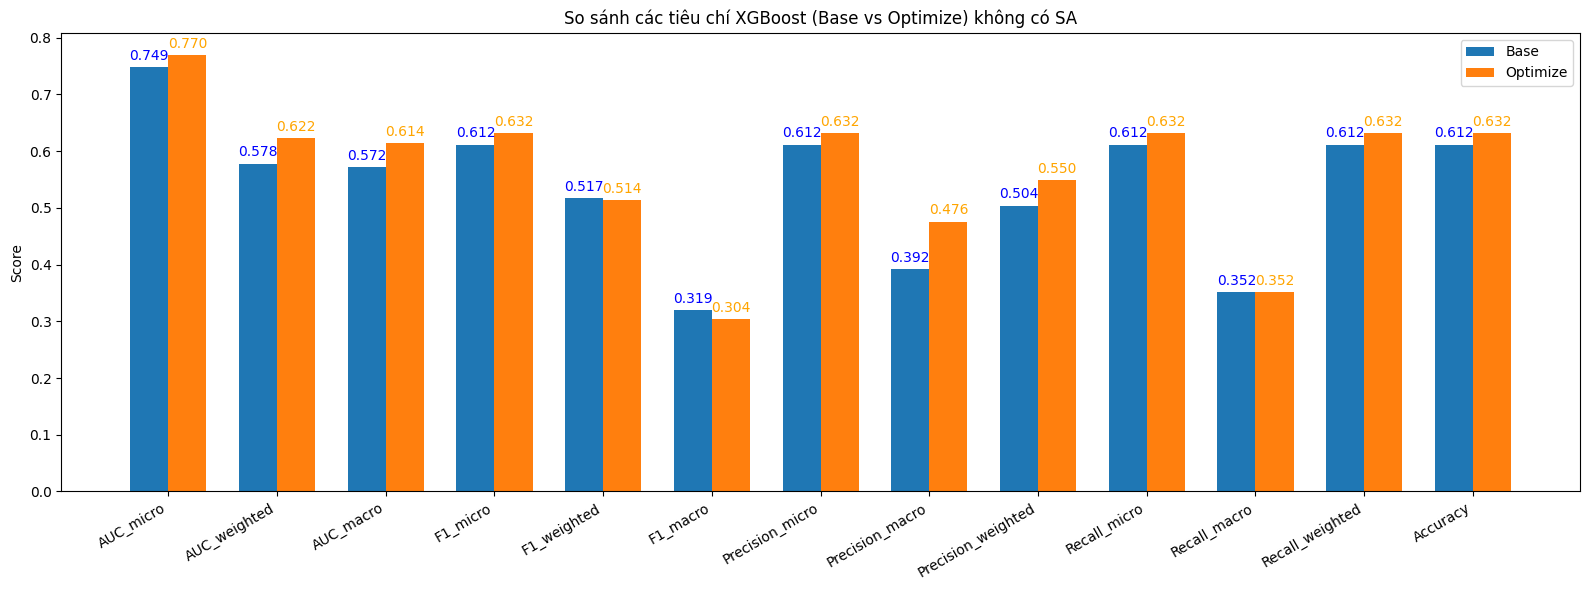

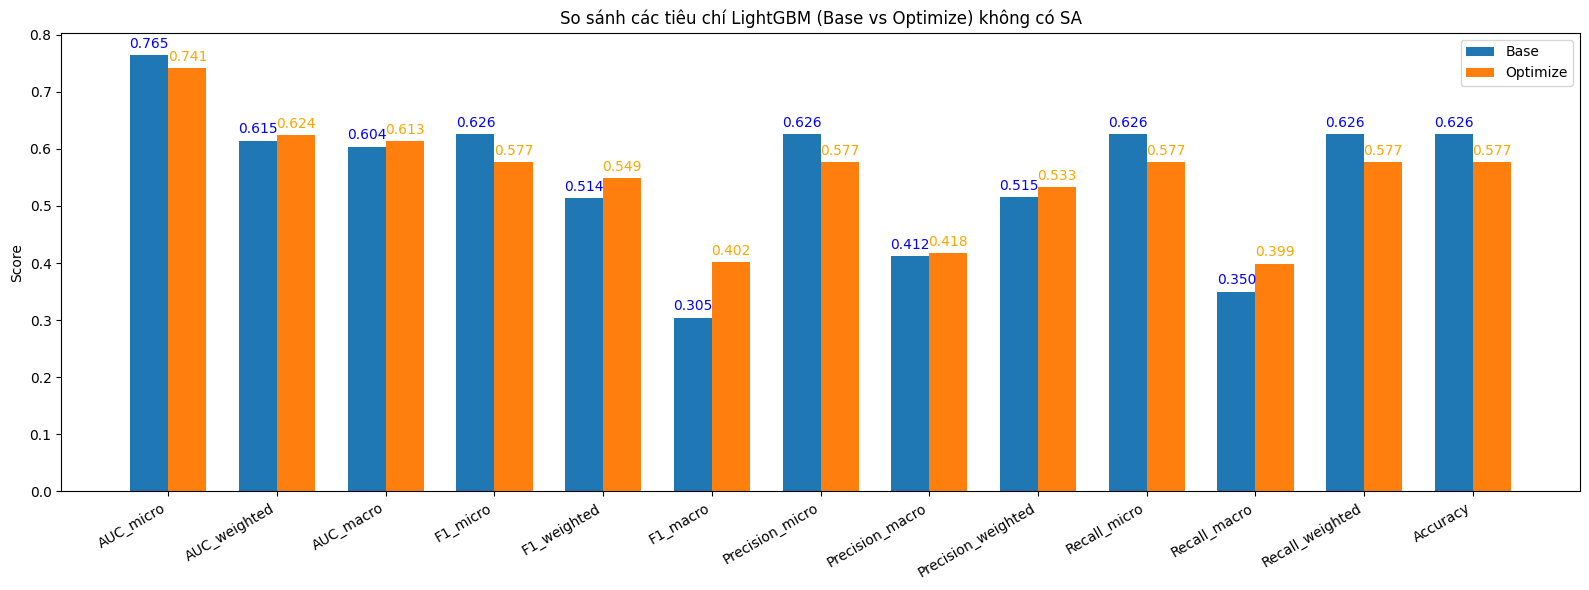

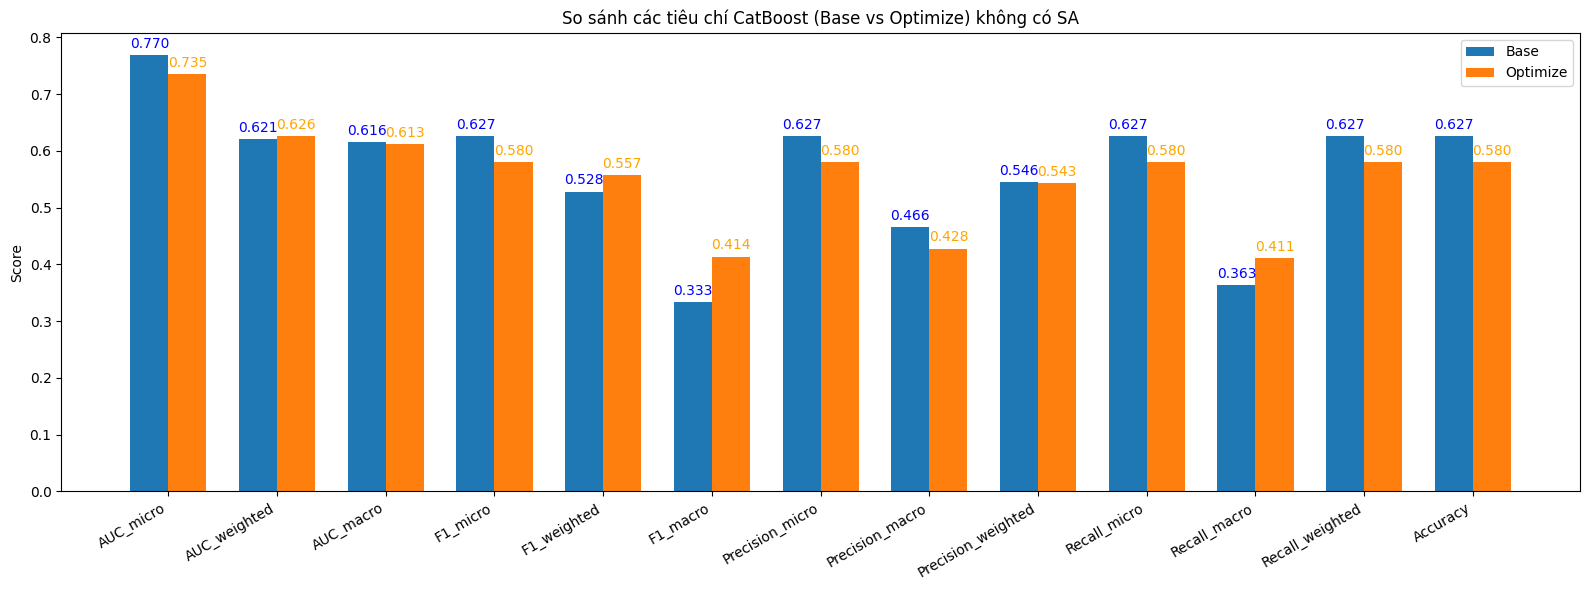

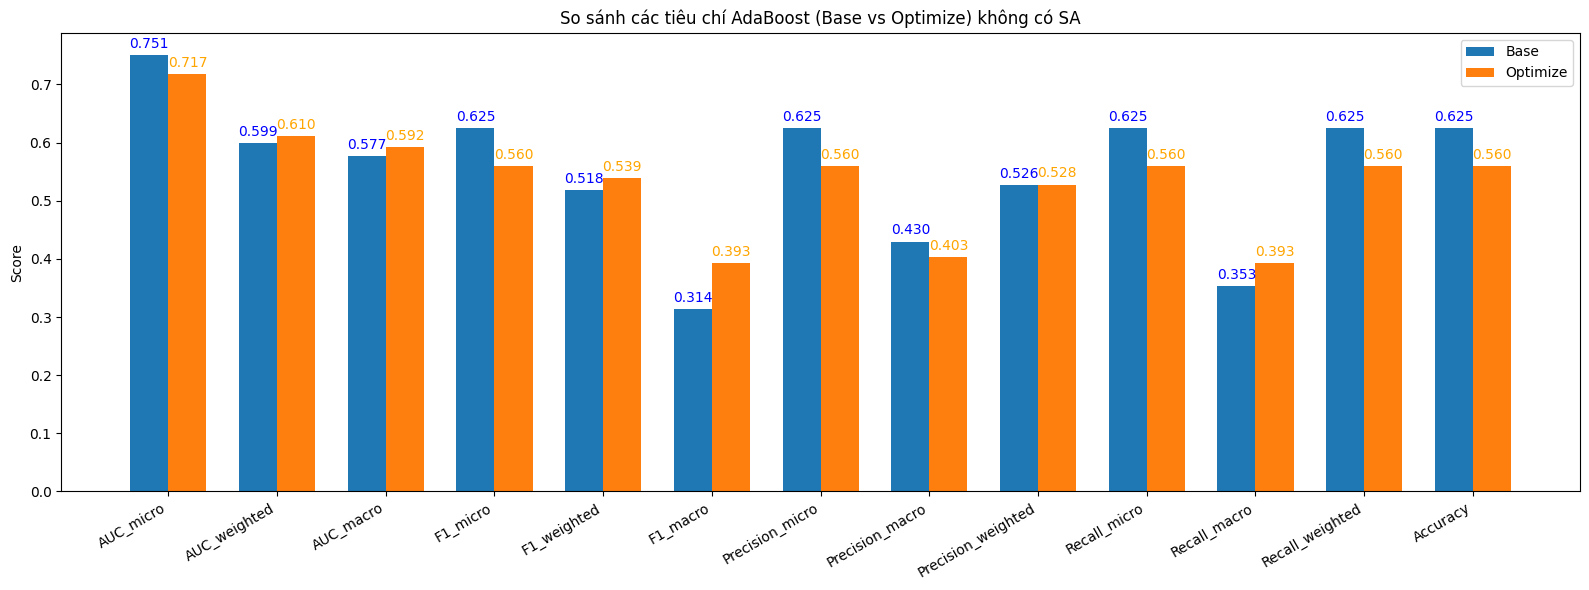

In [48]:
for base_name, opt_name in base_optimize_pairs:
    try:
        idx_base = model_names.index(base_name)
        idx_opt = model_names.index(opt_name)
    except ValueError:
        continue

    metrics = {
        "AUC_micro": [auc_micro_scores_no_sa[idx_base], auc_micro_scores_no_sa[idx_opt]],
        "AUC_weighted": [auc_weighted_scores_no_sa[idx_base], auc_weighted_scores_no_sa[idx_opt]],
        "AUC_macro": [auc_macro_scores_no_sa[idx_base], auc_macro_scores_no_sa[idx_opt]],
        "F1_micro": [f1_micro_scores_no_sa[idx_base], f1_micro_scores_no_sa[idx_opt]],
        "F1_weighted": [f1_weighted_scores_no_sa[idx_base], f1_weighted_scores_no_sa[idx_opt]],
        "F1_macro": [f1_macro_scores_no_sa[idx_base], f1_macro_scores_no_sa[idx_opt]],
        "Precision_micro": [precision_micro_scores_no_sa[idx_base], precision_micro_scores_no_sa[idx_opt]],
        "Precision_macro": [precision_macro_scores_no_sa[idx_base], precision_macro_scores_no_sa[idx_opt]],
        "Precision_weighted": [precision_weighted_scores_no_sa[idx_base], precision_weighted_scores_no_sa[idx_opt]],
        "Recall_micro": [recall_micro_scores_no_sa[idx_base], recall_micro_scores_no_sa[idx_opt]],
        "Recall_macro": [recall_macro_scores_no_sa[idx_base], recall_macro_scores_no_sa[idx_opt]],
        "Recall_weighted": [recall_weighted_scores_no_sa[idx_base], recall_weighted_scores_no_sa[idx_opt]],
        "Accuracy": [acc_scores_no_sa[idx_base], acc_scores_no_sa[idx_opt]],
    }
    labels = list(metrics.keys())
    base_scores = [v[0] for v in metrics.values()]
    opt_scores = [v[1] for v in metrics.values()]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(16, 6))
    bars1 = ax.bar(x - width/2, base_scores, width, label='Base')
    bars2 = ax.bar(x + width/2, opt_scores, width, label='Optimize')

    # Thêm số liệu trên đầu cột
    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    color='blue')
    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    color='orange')

    ax.set_ylabel('Score')
    ax.set_title(f'So sánh các tiêu chí {base_name} (Base vs Optimize) không có SA')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=30, ha='right')
    ax.legend()
    plt.tight_layout()
    plt.show()

SO SÁNH GIỮA CÁC CHỈ SỐ GIỮA CÁC MÔ HÌNH KHÁC NHAU TRƯỜNG HỢP KHÔNG CÓ SENTIMENT ANALYSIS

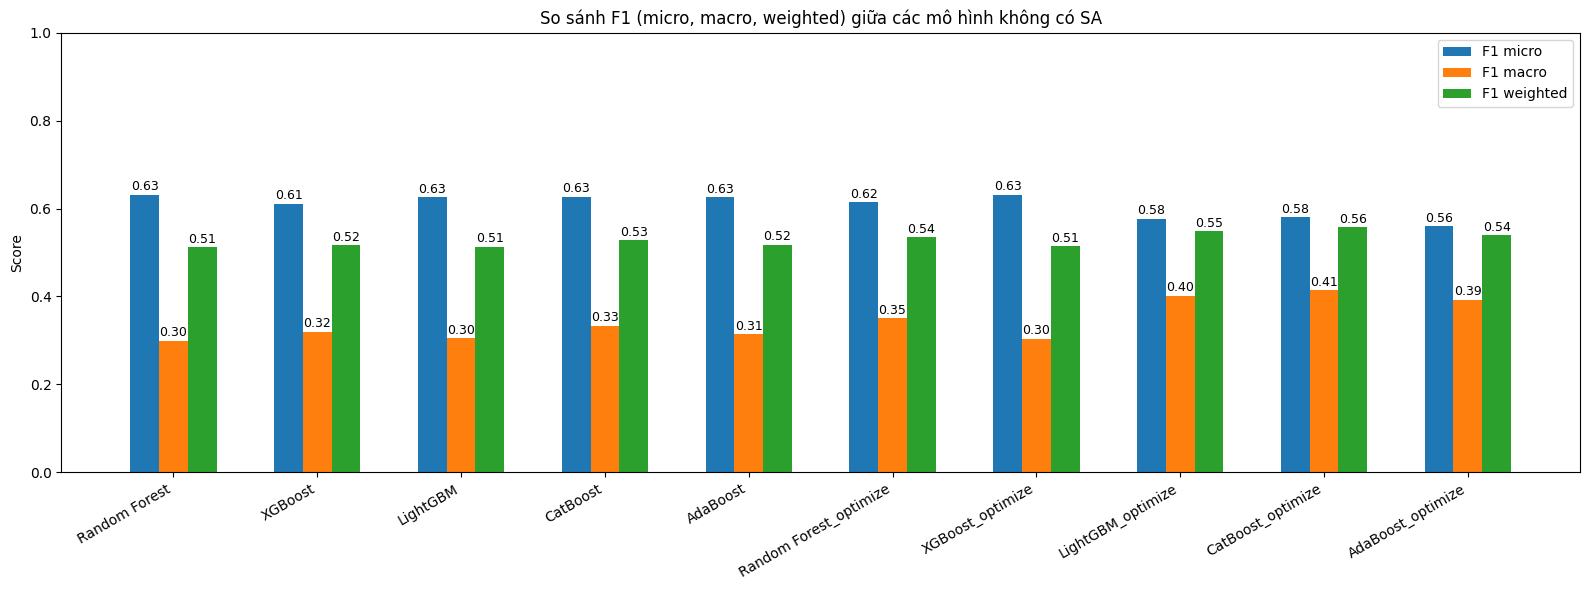

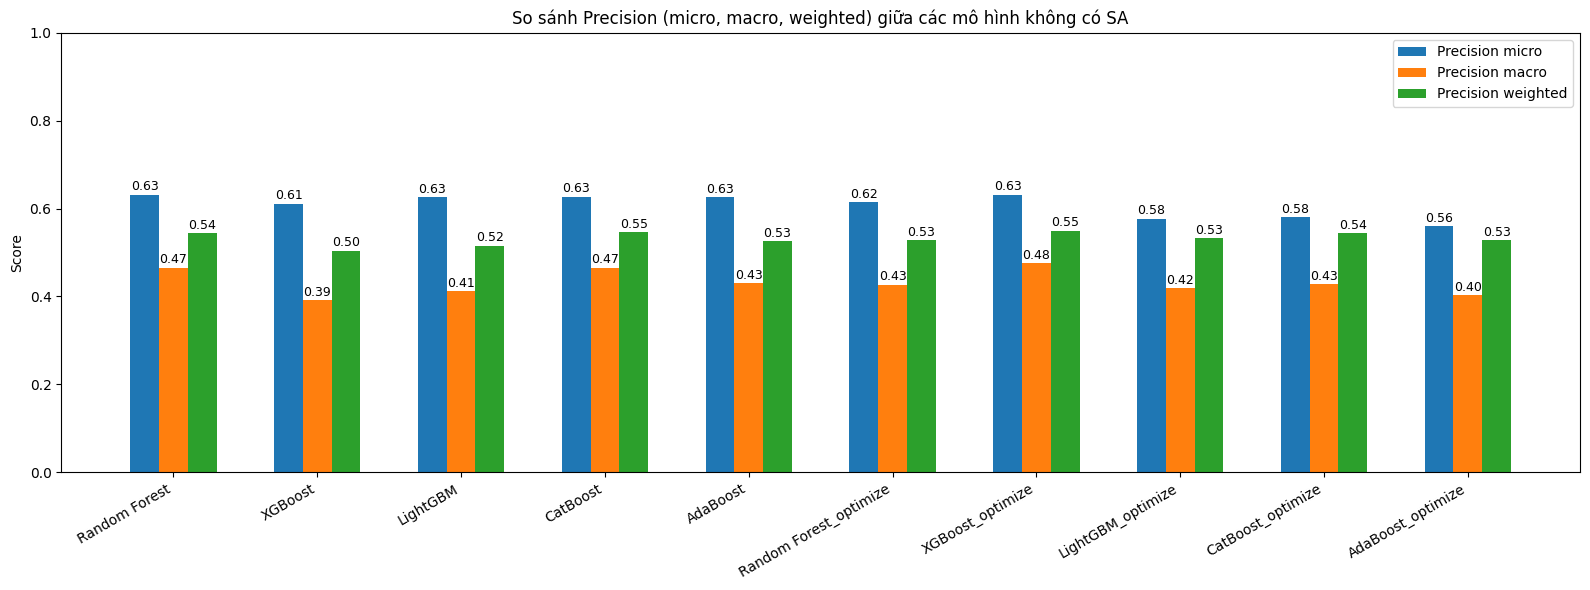

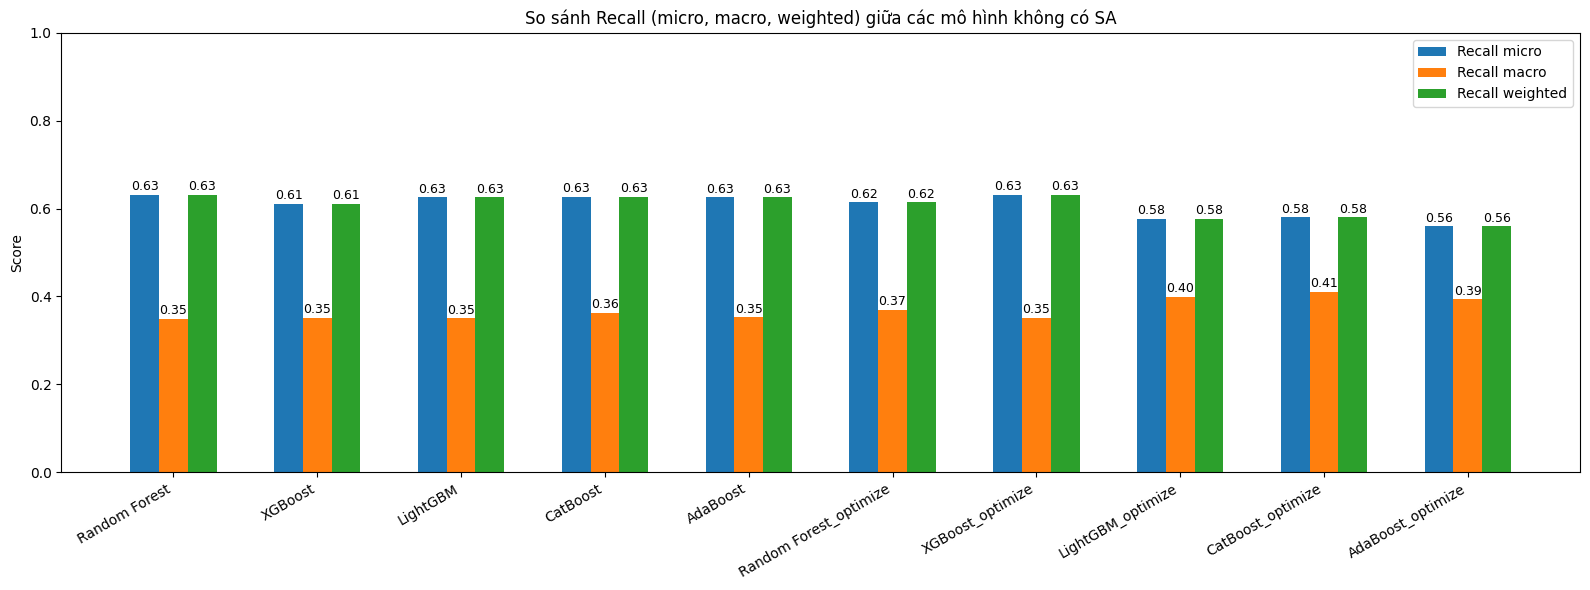

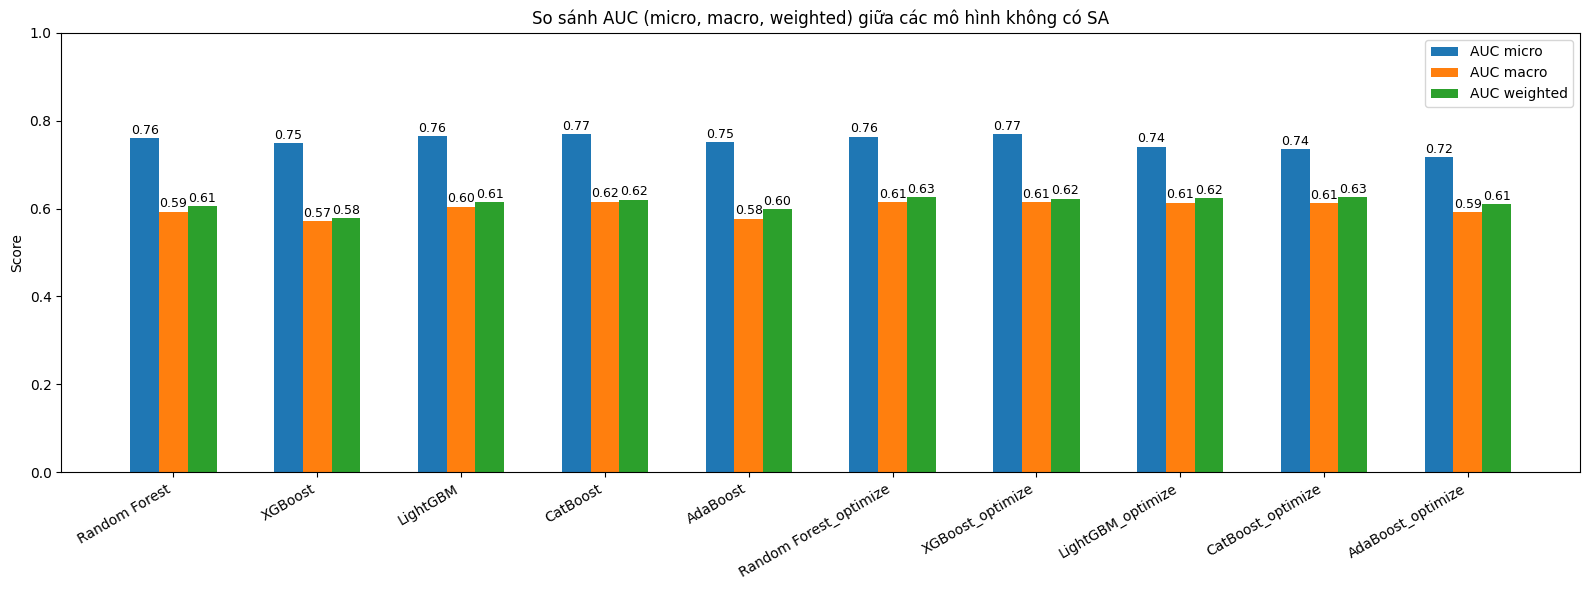

In [49]:
# Ví dụ với F1-score, bạn có thể làm tương tự cho Precision, Recall, AUC
metrics_dict = {
    "F1": [f1_micro_scores_no_sa, f1_macro_scores_no_sa, f1_weighted_scores_no_sa],
    "Precision": [precision_micro_scores_no_sa, precision_macro_scores_no_sa, precision_weighted_scores_no_sa],
    "Recall": [recall_micro_scores_no_sa, recall_macro_scores_no_sa, recall_weighted_scores_no_sa],
    "AUC": [auc_micro_scores_no_sa, auc_macro_scores_no_sa, auc_weighted_scores_no_sa]
}
metric_names = ["F1", "Precision", "Recall", "AUC"]
score_types = ["micro", "macro", "weighted"]
x = np.arange(len(model_names))
width = 0.2

for metric, scores_list in metrics_dict.items():
    plt.figure(figsize=(16, 6))
    for i, scores in enumerate(scores_list):
        plt.bar(x + i*width - width, scores, width, label=f"{metric} {score_types[i]}")
        for j, v in enumerate(scores):
            plt.text(j + i*width - width, v + 0.01, f"{v:.2f}", ha='center', color='black', fontsize=9)
    plt.xticks(x, model_names, rotation=30, ha='right')
    plt.ylim(0, 1)
    plt.ylabel('Score')
    plt.title(f"So sánh {metric} (micro, macro, weighted) giữa các mô hình không có SA")
    plt.legend()
    plt.tight_layout()
    plt.show()

Evaluate with ta + fa + sa data

In [54]:
# Danh sách các mô hình
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced_subsample'),
    "XGBoost": XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(n_jobs=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Random Forest_optimize": RandomForestClassifier(
        n_jobs=-1,
        random_state=42,
        class_weight='balanced_subsample',
        n_estimators= 761,
        max_depth = 27,
        min_samples_split = 11, 
        min_samples_leaf = 7, 
        max_features = 'sqrt'
        
    ),
    "XGBoost_optimize": XGBClassifier(
        n_jobs=-1,
        random_state=42, 
        use_label_encoder=False, 
        eval_metric='mlogloss',
        n_estimators = 1089,
        max_depth = 8, 
        learning_rate = 0.010501883895575981, 
        subsample = 0.9005472962597326, 
        colsample_bytree = 0.22675172202304014
    ),
    "LightGBM_optimize": LGBMClassifier(
        class_weight = "balanced",
        objective = "multiclass",
        metric = "multi_logloss",
        verbosity = -1,
        random_state = 42,
        n_jobs = -1,
        n_estimators = 613, 
        max_depth = 7, 
        learning_rate = 0.011519820484247618, 
        num_leaves = 121, 
        subsample = 0.730110631294915, 
        colsample_bytree = 0.543138552893643, 
        min_child_samples = 63
    ),
    "CatBoost_optimize": CatBoostClassifier(
        verbose=0,
        auto_class_weights = "Balanced",  # giúp giảm mất cân bằng lớp
        loss_function = "MultiClass",
        eval_metric = "MultiClass",
        random_seed = 42,
        iterations = 1311,
        depth = 7, 
        learning_rate = 0.020525401225104004, 
        l2_leaf_reg = 5.131834991782235, 
        bagging_temperature = 0.15935414961035554, 
        random_strength = 0.7351033012149538, 
        border_count = 49
    ),
    "AdaBoost_optimize": AdaBoostClassifier(
        random_state=42,
        n_estimators = 71, 
        learning_rate = 0.26073274783767286, 
        algorithm = 'SAMME.R', 
        estimator = DecisionTreeClassifier(max_depth=2, class_weight="balanced"),
    ),
}

In [13]:

X_train_with_sa = df_global_train[features]  # features = ta + fa + sa
X_test_with_sa = df_global_test[features]

scaler = StandardScaler()
X_train_with_sa_scaled = scaler.fit_transform(X_train_with_sa)   # Fit scaler trên train, scale train luôn
X_test_with_sa_scaled = scaler.transform(X_test_with_sa)  

In [55]:
# Đánh giá với bộ feature có SA (ta + fa + sa)
print("Đánh giá với bộ feature có SA (ta + fa +sa)")
model_names, \
f1_weighted_scores_with_sa, f1_micro_scores_with_sa, \
f1_macro_scores_with_sa, acc_scores_with_sa, \
auc_micro_scores_with_sa, auc_weighted_scores_with_sa, auc_macro_scores_with_sa, \
precision_micro_scores_with_sa, precision_macro_scores_with_sa, precision_weighted_scores_with_sa, \
recall_micro_scores_with_sa, recall_macro_scores_with_sa, recall_weighted_scores_with_sa, \
roc_data_with_sa = evaluate_models(
    X_train_with_sa_scaled, X_test_with_sa_scaled, y_train, y_test, models
)

Đánh giá với bộ feature có SA (ta + fa +sa)
Random Forest Test F1 (weighted): 0.5142
Random Forest Test F1 (micro)   : 0.6321
Random Forest Test F1 (macro)   : 0.3040
Random Forest Test Accuracy     : 0.6321
Random Forest Precision (micro/macro/weighted): 0.6321 / 0.4798 / 0.5518
Random Forest Recall (micro/macro/weighted): 0.6321 / 0.3517 / 0.6321
              precision    recall  f1-score   support

           0       0.38      0.03      0.05      1302
           1       0.64      0.98      0.77      4656
           2       0.42      0.05      0.08      1422

    accuracy                           0.63      7380
   macro avg       0.48      0.35      0.30      7380
weighted avg       0.55      0.63      0.51      7380

Random Forest ROC AUC (micro ovr): 0.7692
Random Forest ROC AUC (weighted ovr): 0.6224
Random Forest ROC AUC (macro ovr): 0.6120


[19:48:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost Test F1 (weighted): 0.5565
XGBoost Test F1 (micro)   : 0.6332
XGBoost Test F1 (macro)   : 0.3750
XGBoost Test Accuracy     : 0.6332
XGBoost Precision (micro/macro/weighted): 0.6332 / 0.4624 / 0.5550
XGBoost Recall (micro/macro/weighted): 0.6332 / 0.3880 / 0.6332
              precision    recall  f1-score   support

           0       0.35      0.10      0.15      1302
           1       0.67      0.94      0.78      4656
           2       0.36      0.13      0.19      1422

    accuracy                           0.63      7380
   macro avg       0.46      0.39      0.37      7380
weighted avg       0.55      0.63      0.56      7380

XGBoost ROC AUC (micro ovr): 0.7756
XGBoost ROC AUC (weighted ovr): 0.6389
XGBoost ROC AUC (macro ovr): 0.6260
LightGBM Test F1 (weighted): 0.5571
LightGBM Test F1 (micro)   : 0.6470
LightGBM Test F1 (macro)   : 0.3691
LightGBM Test Accuracy     : 0.6470
LightGBM Precision (micro/macro/weighted): 0.6470 / 0.5096 / 0.5799
LightGBM Recall (micro/ma

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost Test F1 (weighted): 0.5379
AdaBoost Test F1 (micro)   : 0.6285
AdaBoost Test F1 (macro)   : 0.3449
AdaBoost Test Accuracy     : 0.6285
AdaBoost Precision (micro/macro/weighted): 0.6285 / 0.4410 / 0.5383
AdaBoost Recall (micro/macro/weighted): 0.6285 / 0.3697 / 0.6285
              precision    recall  f1-score   support

           0       0.28      0.07      0.11      1302
           1       0.66      0.95      0.78      4656
           2       0.39      0.09      0.15      1422

    accuracy                           0.63      7380
   macro avg       0.44      0.37      0.34      7380
weighted avg       0.54      0.63      0.54      7380

AdaBoost ROC AUC (micro ovr): 0.7592
AdaBoost ROC AUC (weighted ovr): 0.6188
AdaBoost ROC AUC (macro ovr): 0.5974
Random Forest_optimize Test F1 (weighted): 0.5461
Random Forest_optimize Test F1 (micro)   : 0.6145
Random Forest_optimize Test F1 (macro)   : 0.3708
Random Forest_optimize Test Accuracy     : 0.6145
Random Forest_optimize Preci

[19:51:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost_optimize Test F1 (weighted): 0.5596
XGBoost_optimize Test F1 (micro)   : 0.6493
XGBoost_optimize Test F1 (macro)   : 0.3740
XGBoost_optimize Test Accuracy     : 0.6493
XGBoost_optimize Precision (micro/macro/weighted): 0.6493 / 0.5358 / 0.5934
XGBoost_optimize Recall (micro/macro/weighted): 0.6493 / 0.3910 / 0.6493
              precision    recall  f1-score   support

           0       0.48      0.08      0.14      1302
           1       0.67      0.97      0.79      4656
           2       0.46      0.12      0.19      1422

    accuracy                           0.65      7380
   macro avg       0.54      0.39      0.37      7380
weighted avg       0.59      0.65      0.56      7380

XGBoost_optimize ROC AUC (micro ovr): 0.7909
XGBoost_optimize ROC AUC (weighted ovr): 0.6693
XGBoost_optimize ROC AUC (macro ovr): 0.6565
LightGBM_optimize Test F1 (weighted): 0.5802
LightGBM_optimize Test F1 (micro)   : 0.6179
LightGBM_optimize Test F1 (macro)   : 0.4286
LightGBM_optimize Tes

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost_optimize Test F1 (weighted): 0.5637
AdaBoost_optimize Test F1 (micro)   : 0.5771
AdaBoost_optimize Test F1 (macro)   : 0.4239
AdaBoost_optimize Test Accuracy     : 0.5771
AdaBoost_optimize Precision (micro/macro/weighted): 0.5771 / 0.4322 / 0.5549
AdaBoost_optimize Recall (micro/macro/weighted): 0.5771 / 0.4213 / 0.5771
              precision    recall  f1-score   support

           0       0.26      0.25      0.26      1302
           1       0.71      0.77      0.74      4656
           2       0.33      0.24      0.28      1422

    accuracy                           0.58      7380
   macro avg       0.43      0.42      0.42      7380
weighted avg       0.55      0.58      0.56      7380

AdaBoost_optimize ROC AUC (micro ovr): 0.7265
AdaBoost_optimize ROC AUC (weighted ovr): 0.6404
AdaBoost_optimize ROC AUC (macro ovr): 0.6168


SO SÁNH GIỮA BASE MODEL VÀ OPTIMIZED MODEL DỰA TRÊN CÁC TIÊU CHÍ TRƯỜNG HỢP CÓ SENTIMENT ANALYSIS

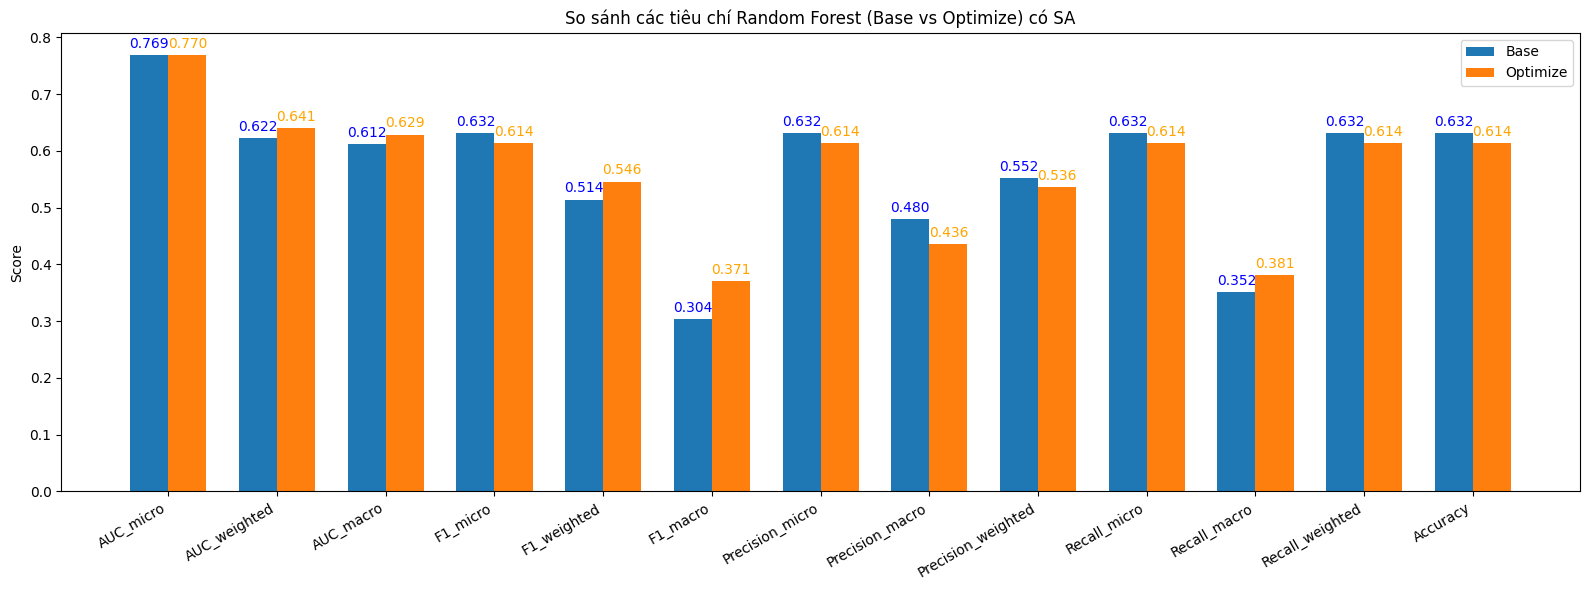

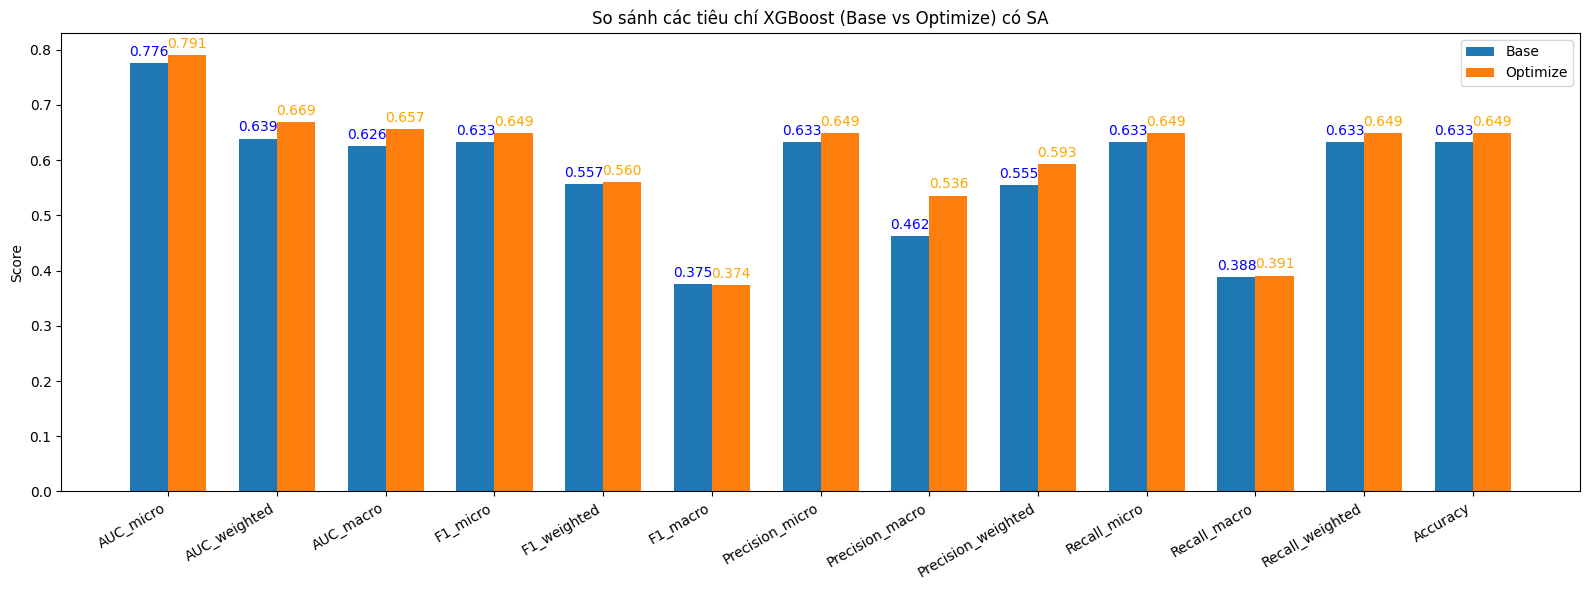

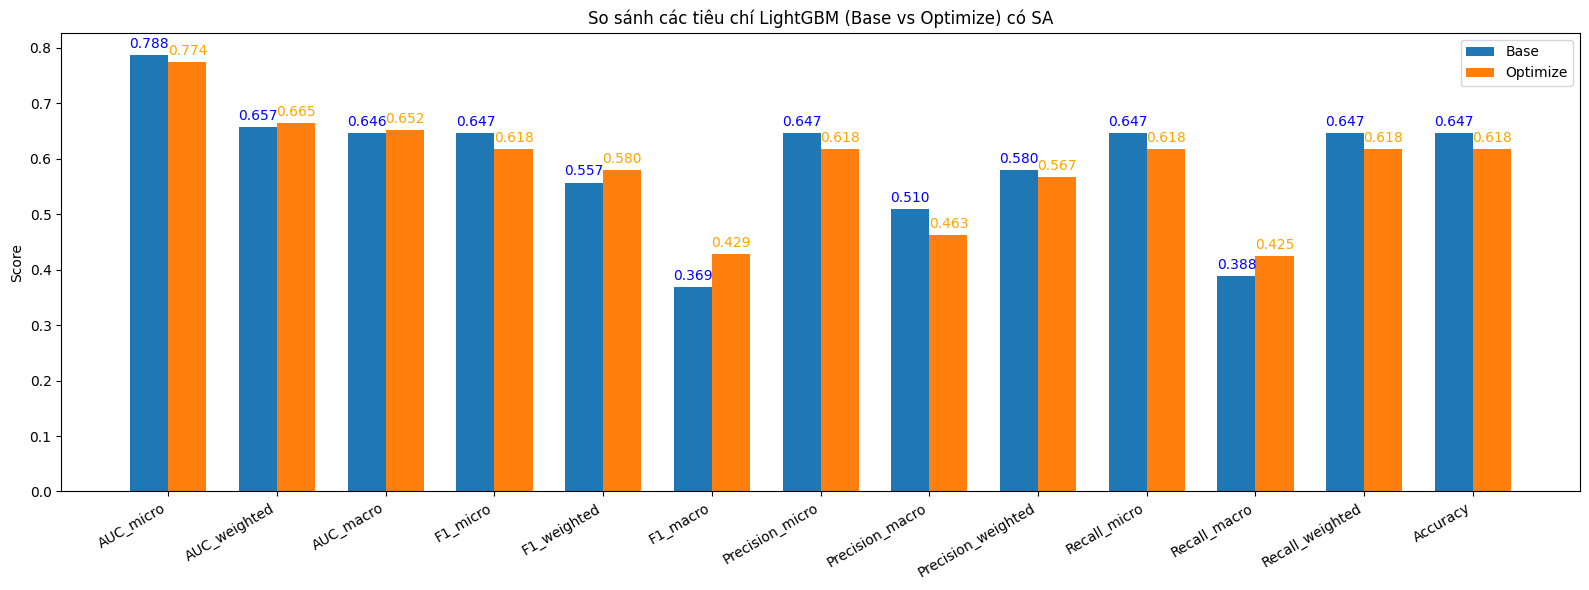

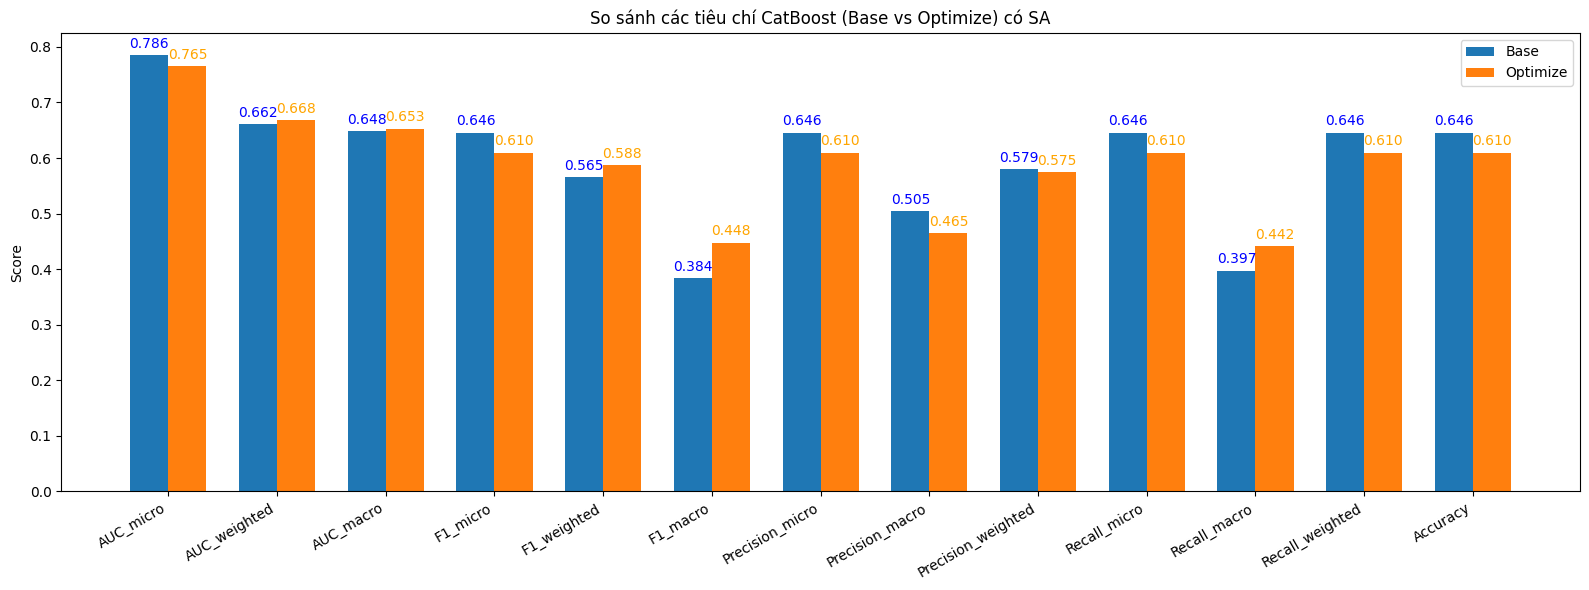

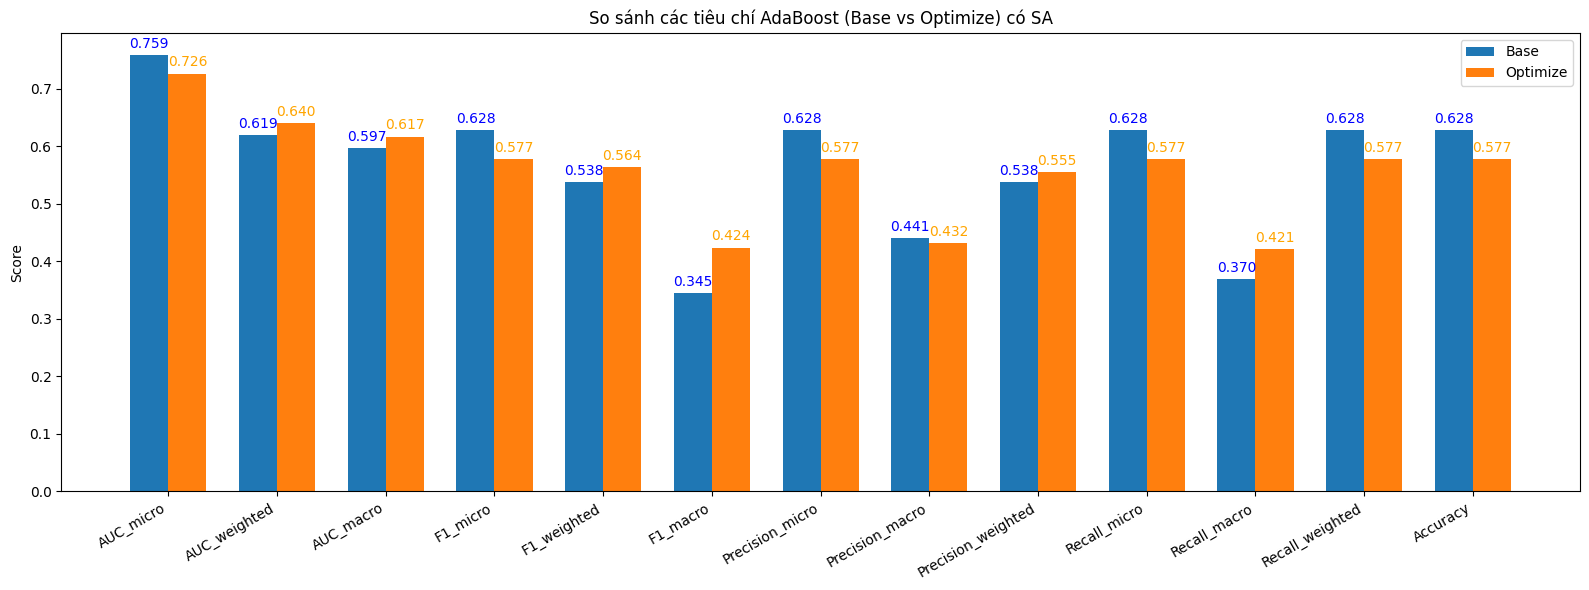

In [56]:
for base_name, opt_name in base_optimize_pairs:
    try:
        idx_base = model_names.index(base_name)
        idx_opt = model_names.index(opt_name)
    except ValueError:
        continue

    metrics = {
        "AUC_micro": [auc_micro_scores_with_sa[idx_base], auc_micro_scores_with_sa[idx_opt]],
        "AUC_weighted": [auc_weighted_scores_with_sa[idx_base], auc_weighted_scores_with_sa[idx_opt]],
        "AUC_macro": [auc_macro_scores_with_sa[idx_base], auc_macro_scores_with_sa[idx_opt]],
        "F1_micro": [f1_micro_scores_with_sa[idx_base], f1_micro_scores_with_sa[idx_opt]],
        "F1_weighted": [f1_weighted_scores_with_sa[idx_base], f1_weighted_scores_with_sa[idx_opt]],
        "F1_macro": [f1_macro_scores_with_sa[idx_base], f1_macro_scores_with_sa[idx_opt]],
        "Precision_micro": [precision_micro_scores_with_sa[idx_base], precision_micro_scores_with_sa[idx_opt]],
        "Precision_macro": [precision_macro_scores_with_sa[idx_base], precision_macro_scores_with_sa[idx_opt]],
        "Precision_weighted": [precision_weighted_scores_with_sa[idx_base], precision_weighted_scores_with_sa[idx_opt]],
        "Recall_micro": [recall_micro_scores_with_sa[idx_base], recall_micro_scores_with_sa[idx_opt]],
        "Recall_macro": [recall_macro_scores_with_sa[idx_base], recall_macro_scores_with_sa[idx_opt]],
        "Recall_weighted": [recall_weighted_scores_with_sa[idx_base], recall_weighted_scores_with_sa[idx_opt]],
        "Accuracy": [acc_scores_with_sa[idx_base], acc_scores_with_sa[idx_opt]],
    }

    labels = list(metrics.keys())
    base_scores = [v[0] for v in metrics.values()]
    opt_scores = [v[1] for v in metrics.values()]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(16, 6))
    bars1 = ax.bar(x - width/2, base_scores, width, label='Base')
    bars2 = ax.bar(x + width/2, opt_scores, width, label='Optimize')

    # Thêm số liệu trên đầu cột
    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    color='blue')
    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    color='orange')

    ax.set_ylabel('Score')
    ax.set_title(f'So sánh các tiêu chí {base_name} (Base vs Optimize) có SA')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=30, ha='right')
    ax.legend()
    plt.tight_layout()
    plt.show()

SO SÁNH CÁC TIÊU CHÍ TRÊN CÁC MÔ HÌNH KHÁC NHAU TRƯỜNG HỢP CÓ SENTIMENT ANALYSIS

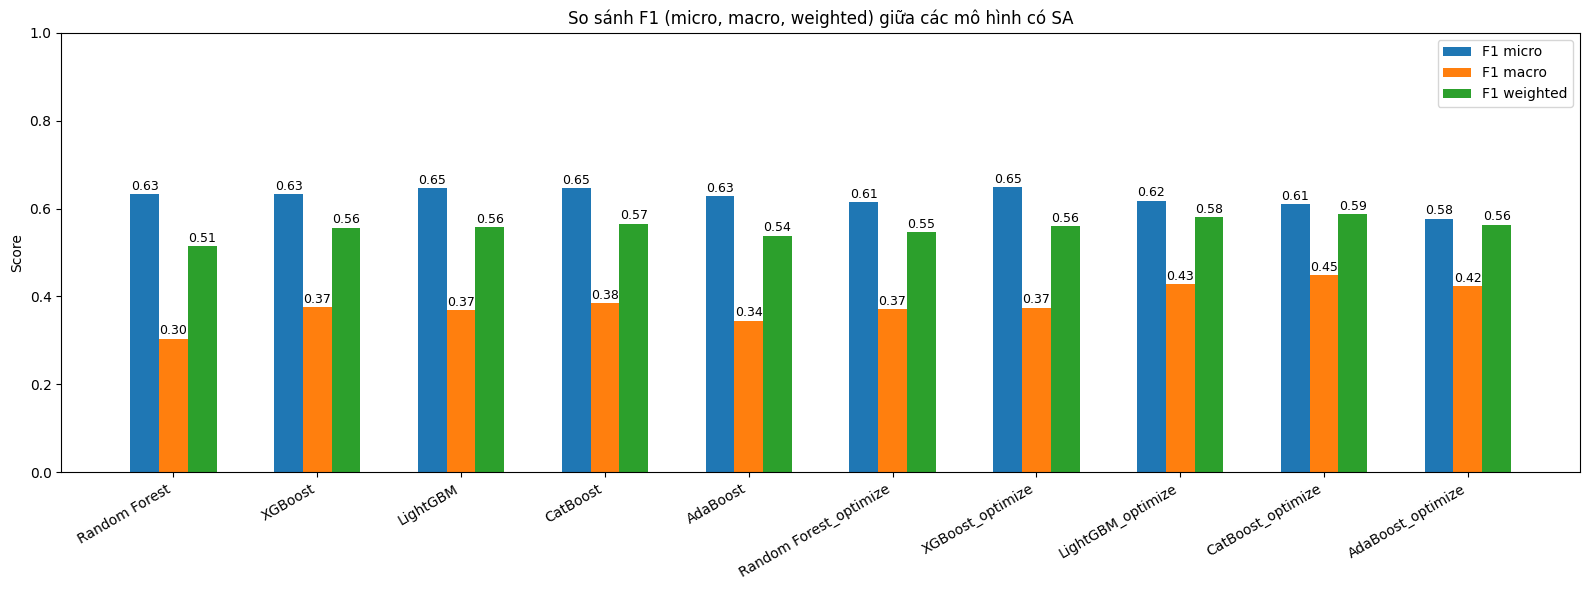

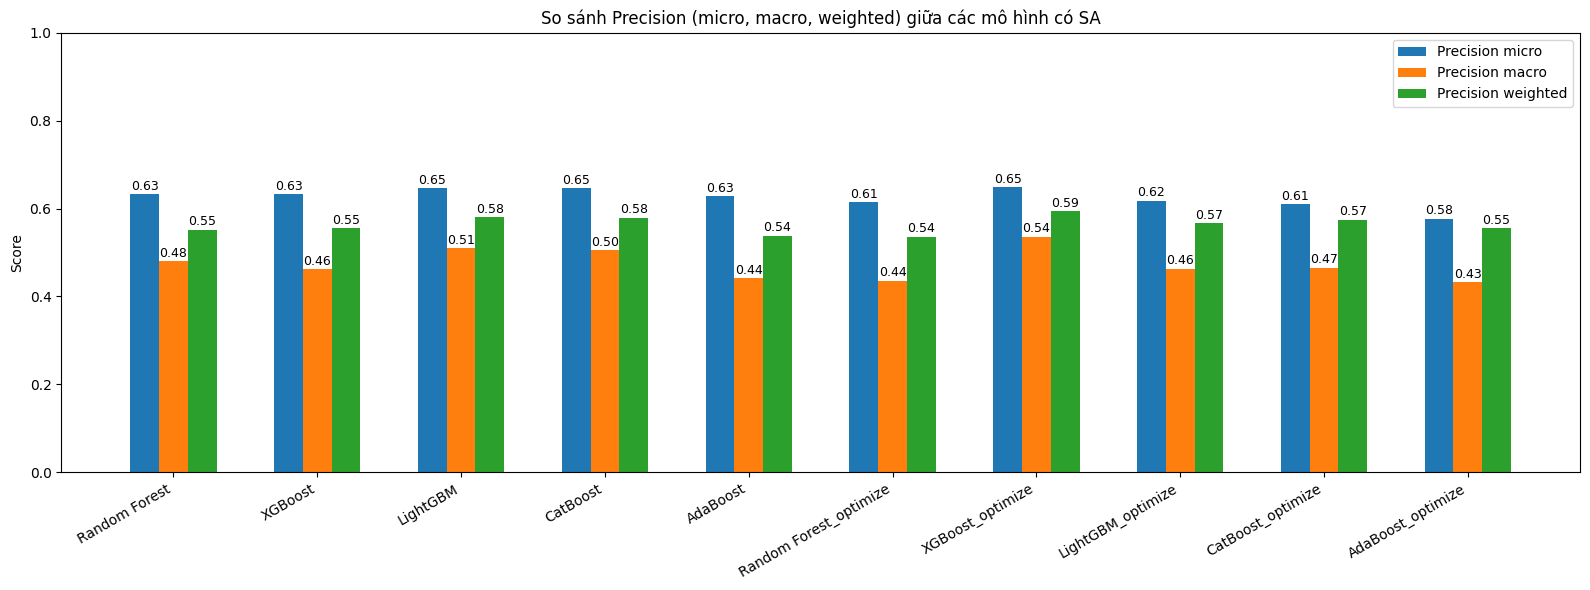

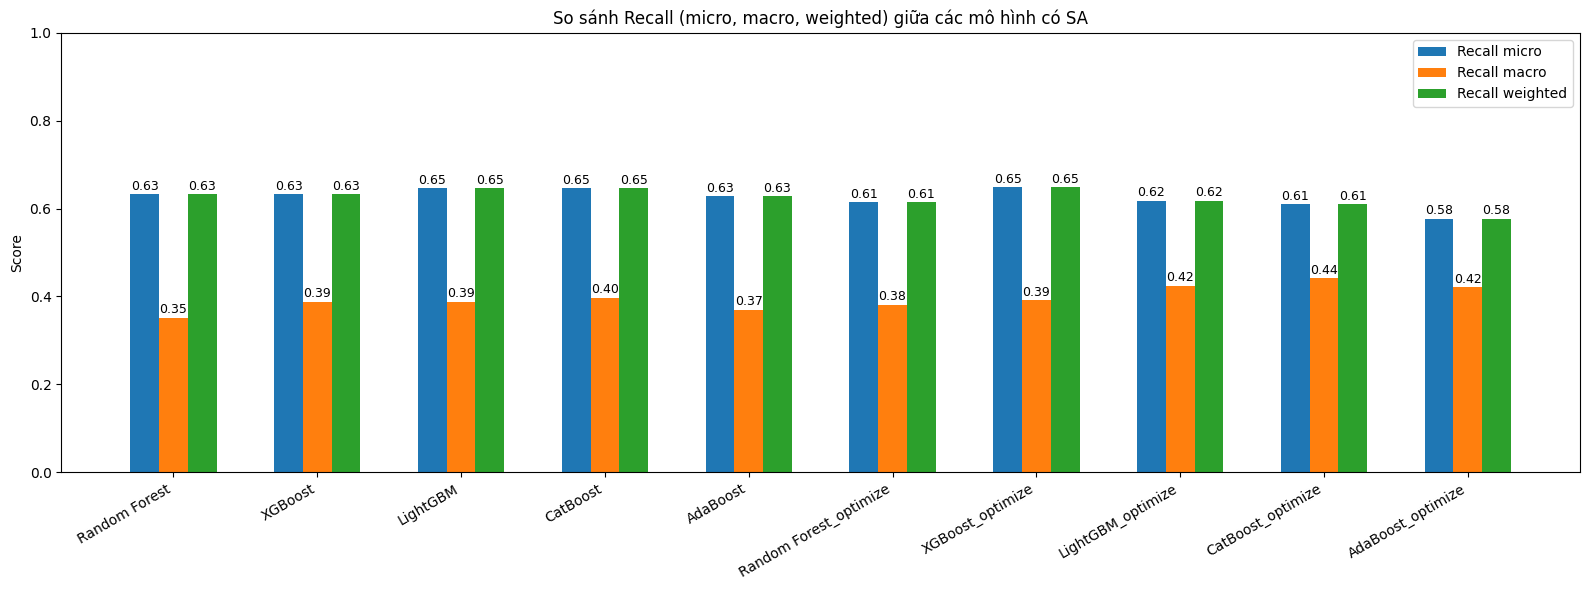

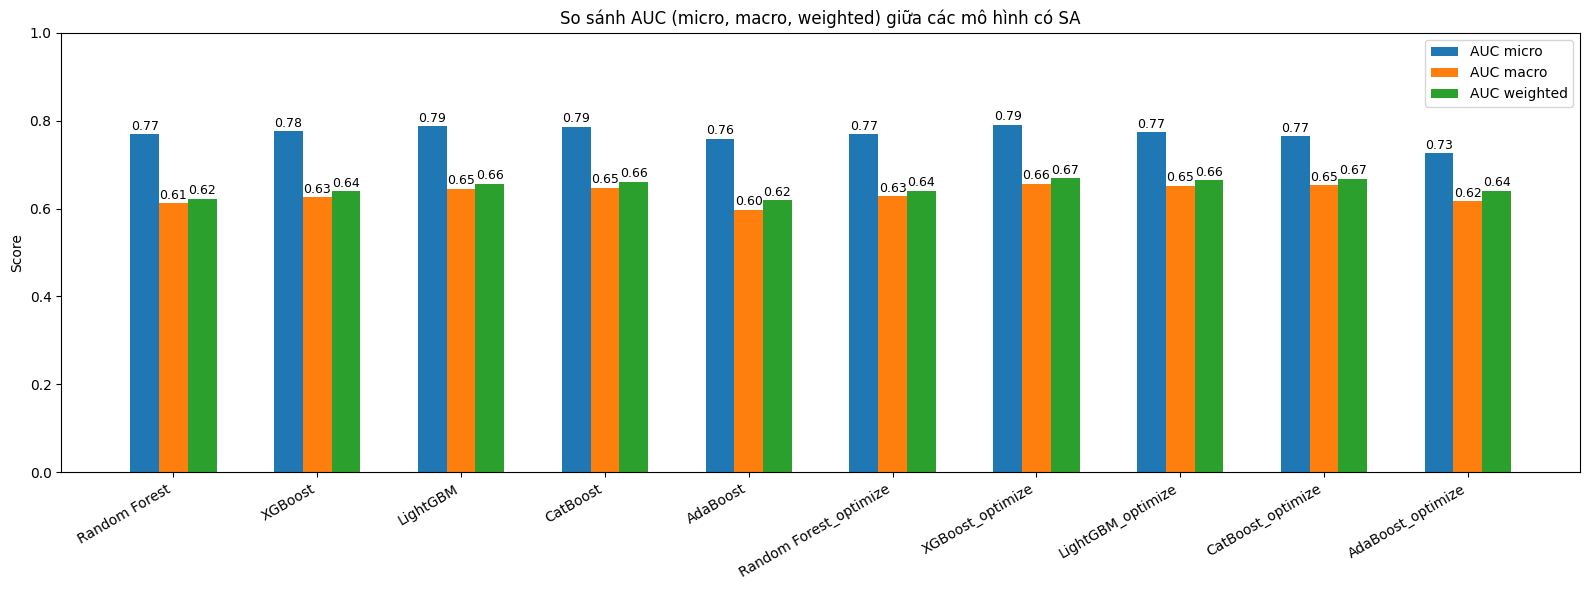

In [57]:
# Ví dụ với F1-score, bạn có thể làm tương tự cho Precision, Recall, AUC
metrics_dict = {
    "F1": [f1_micro_scores_with_sa, f1_macro_scores_with_sa, f1_weighted_scores_with_sa],
    "Precision": [precision_micro_scores_with_sa, precision_macro_scores_with_sa, precision_weighted_scores_with_sa],
    "Recall": [recall_micro_scores_with_sa, recall_macro_scores_with_sa, recall_weighted_scores_with_sa],
    "AUC": [auc_micro_scores_with_sa, auc_macro_scores_with_sa, auc_weighted_scores_with_sa]
}

metric_names = ["F1", "Precision", "Recall", "AUC"]
score_types = ["micro", "macro", "weighted"]
x = np.arange(len(model_names))
width = 0.2

for metric, scores_list in metrics_dict.items():
    plt.figure(figsize=(16, 6))
    for i, scores in enumerate(scores_list):
        plt.bar(x + i*width - width, scores, width, label=f"{metric} {score_types[i]}")
        for j, v in enumerate(scores):
            plt.text(j + i*width - width, v + 0.01, f"{v:.2f}", ha='center', color='black', fontsize=9)
    plt.xticks(x, model_names, rotation=30, ha='right')
    plt.ylim(0, 1)
    plt.ylabel('Score')
    plt.title(f"So sánh {metric} (micro, macro, weighted) giữa các mô hình có SA")
    plt.legend()
    plt.tight_layout()
    plt.show()

SO SÁNH CÁC CHỈ SỐ GIỮA MÔ HÌNH CÓ VÀ KHÔNG SỬ DỤNG SENTIMENT ANALYSIS

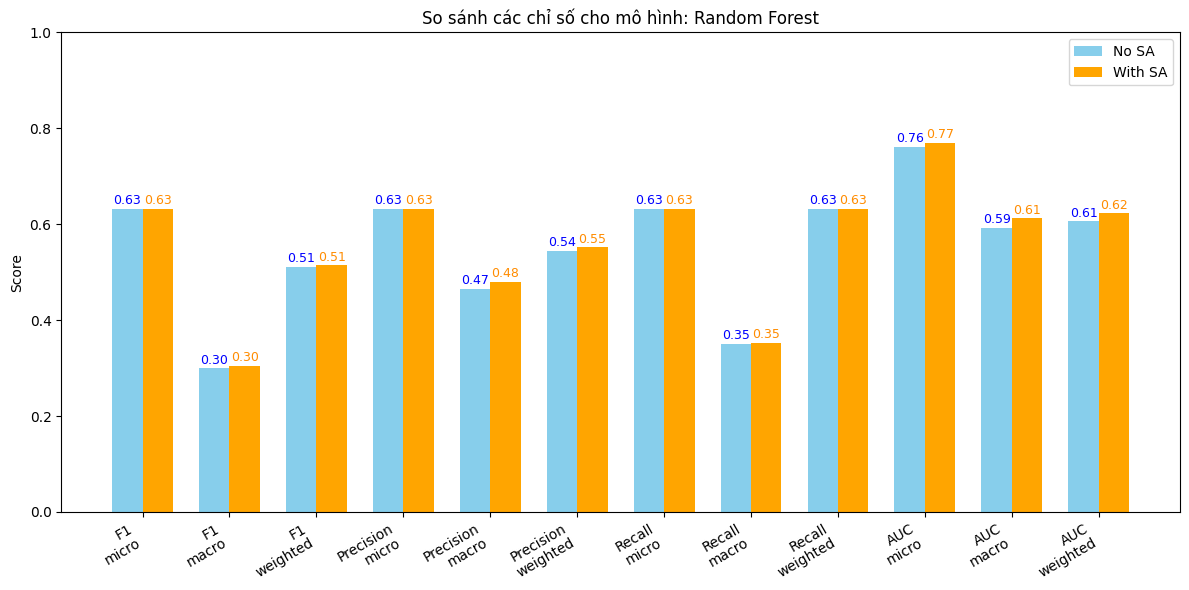

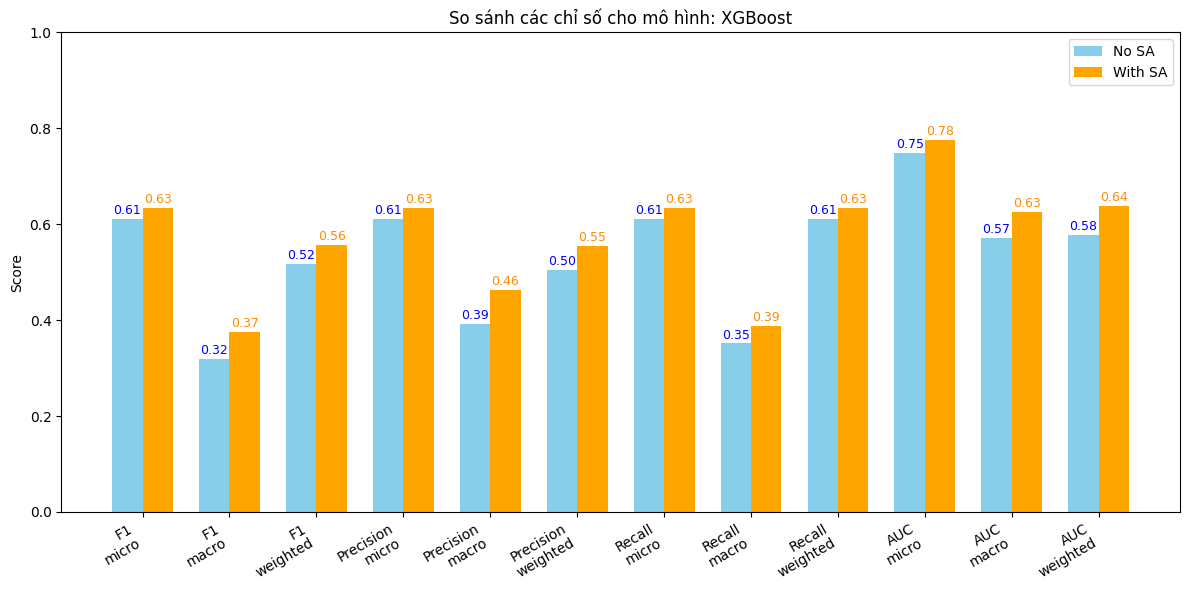

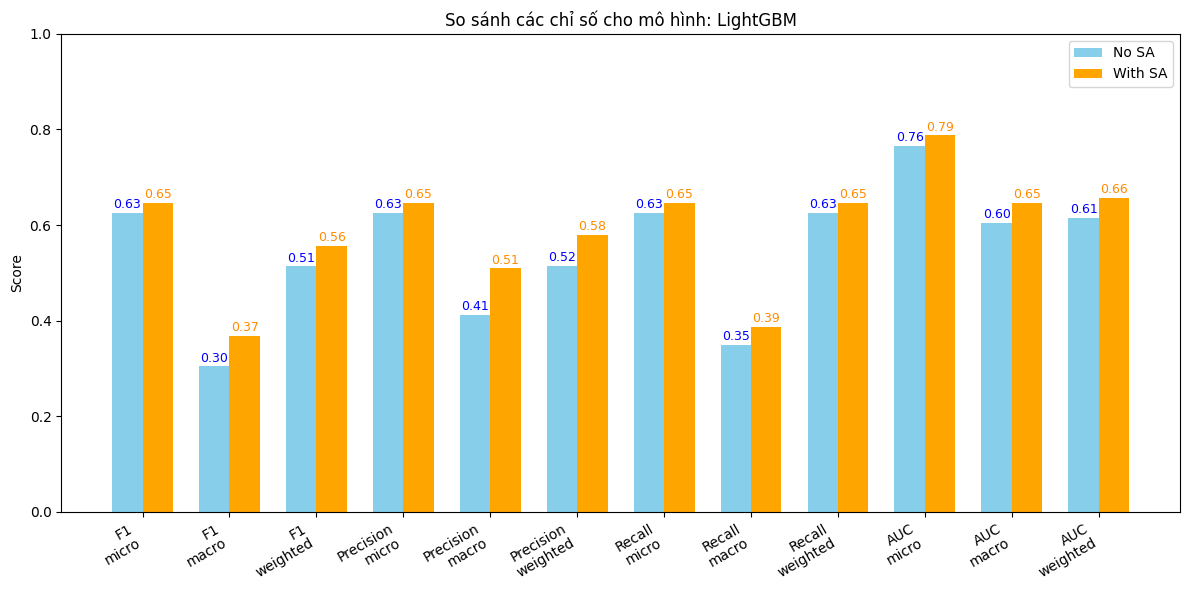

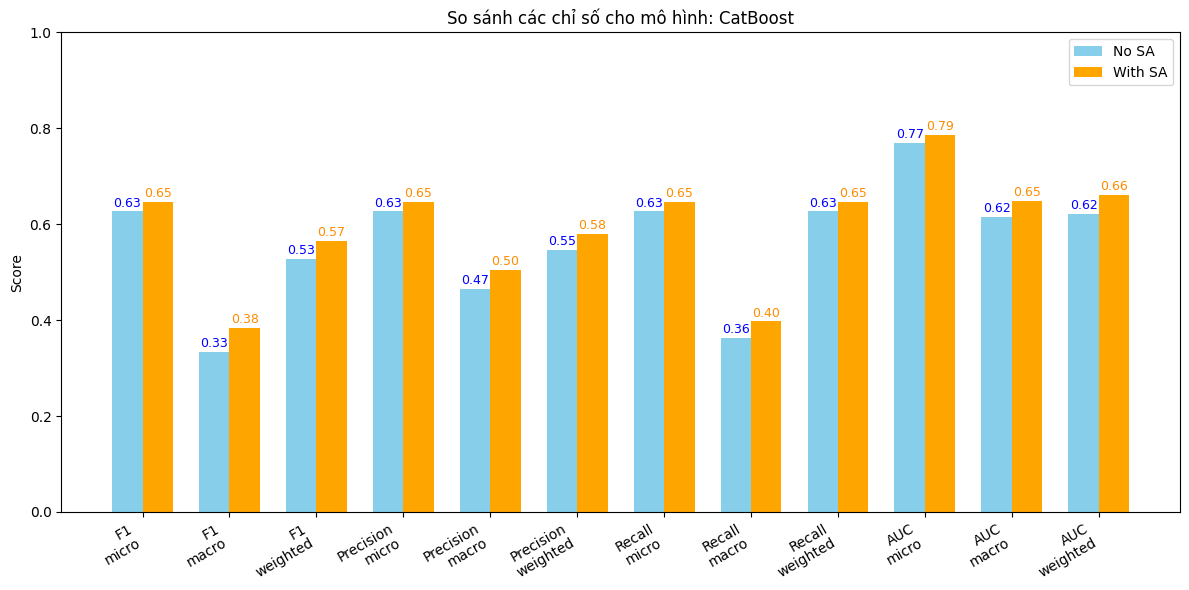

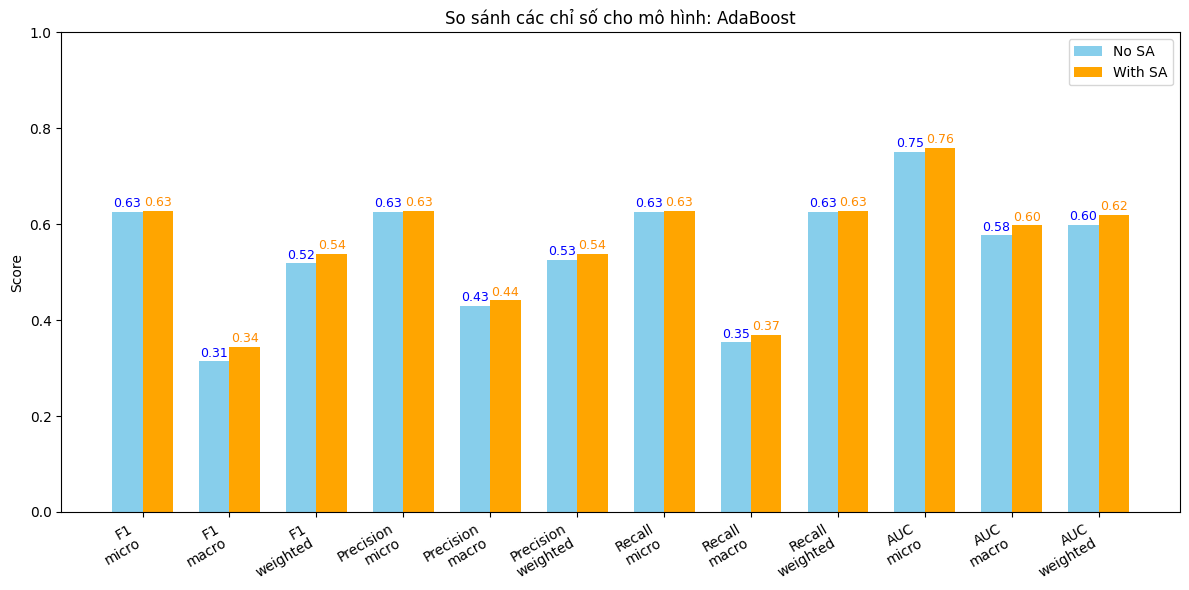

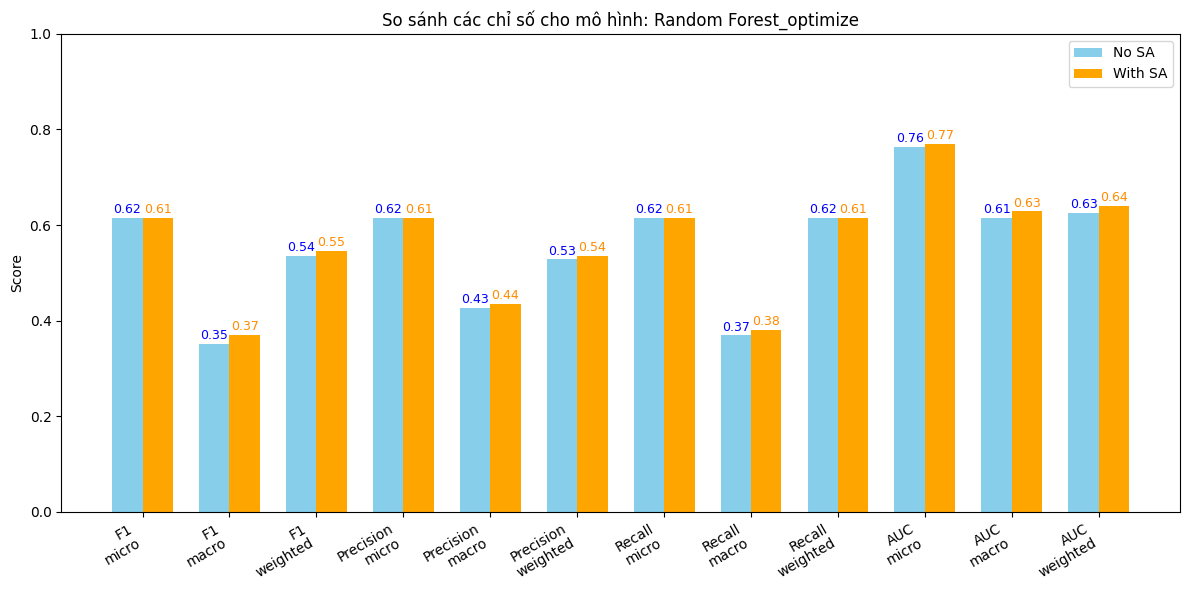

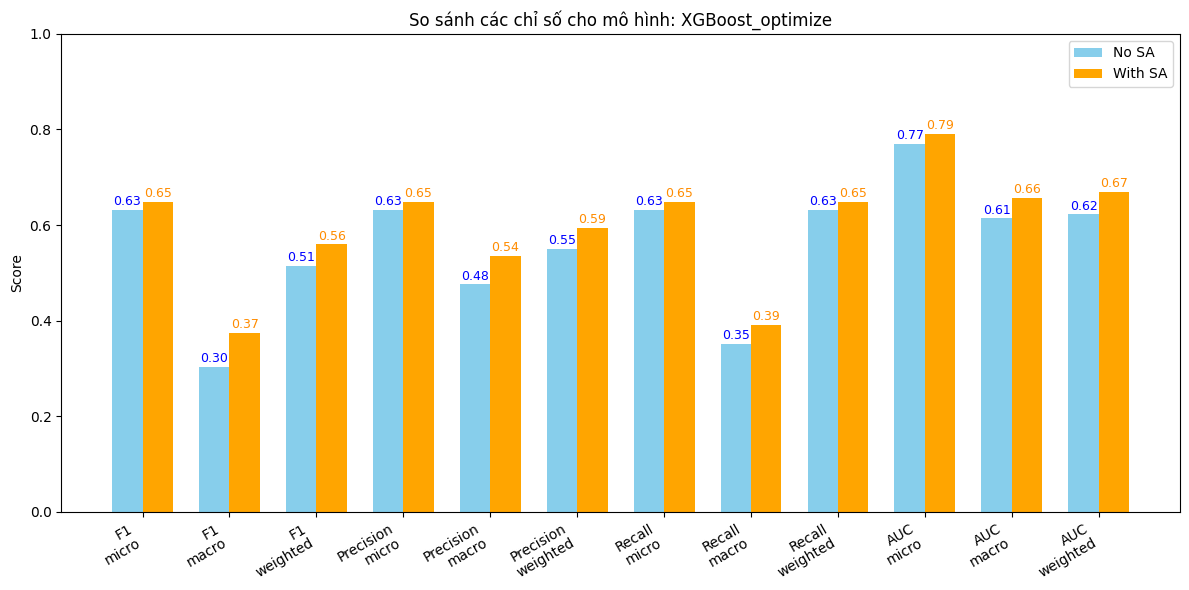

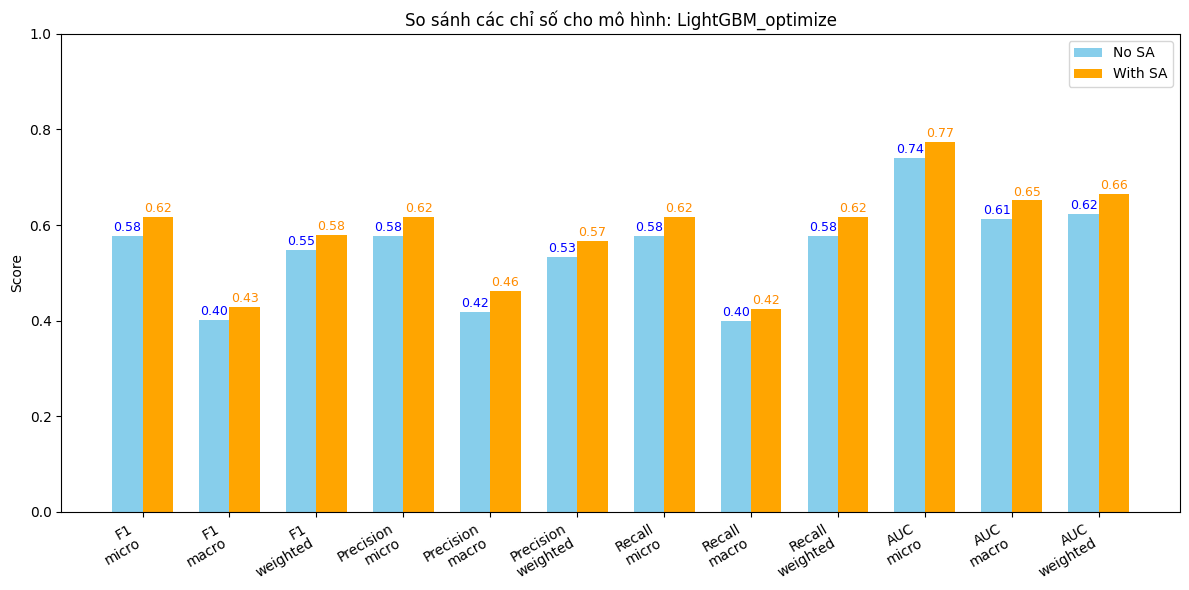

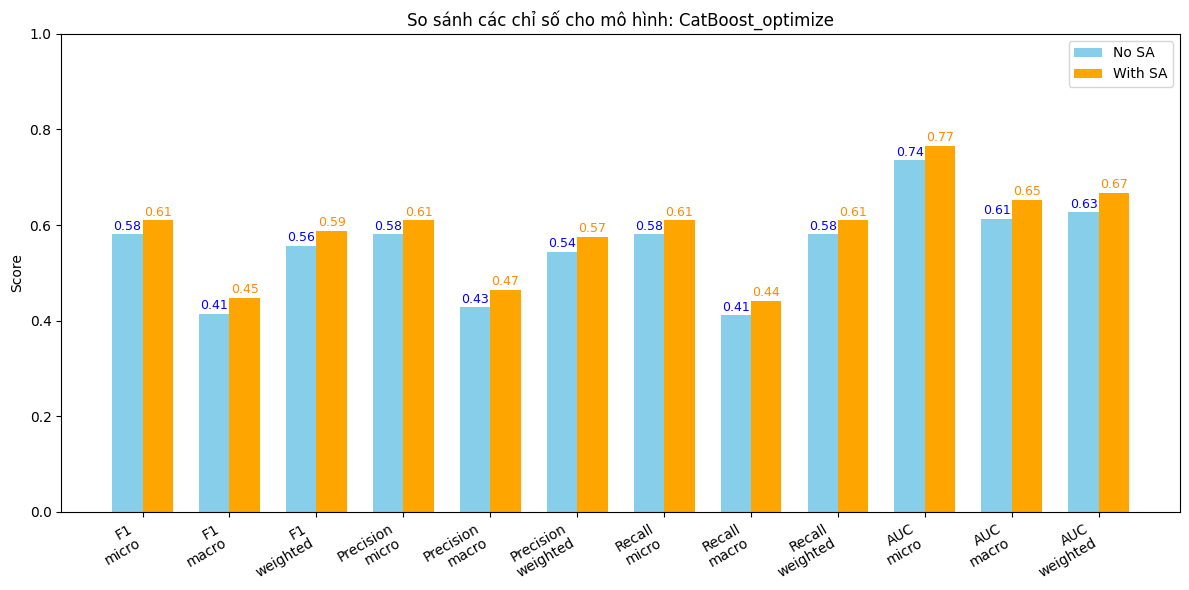

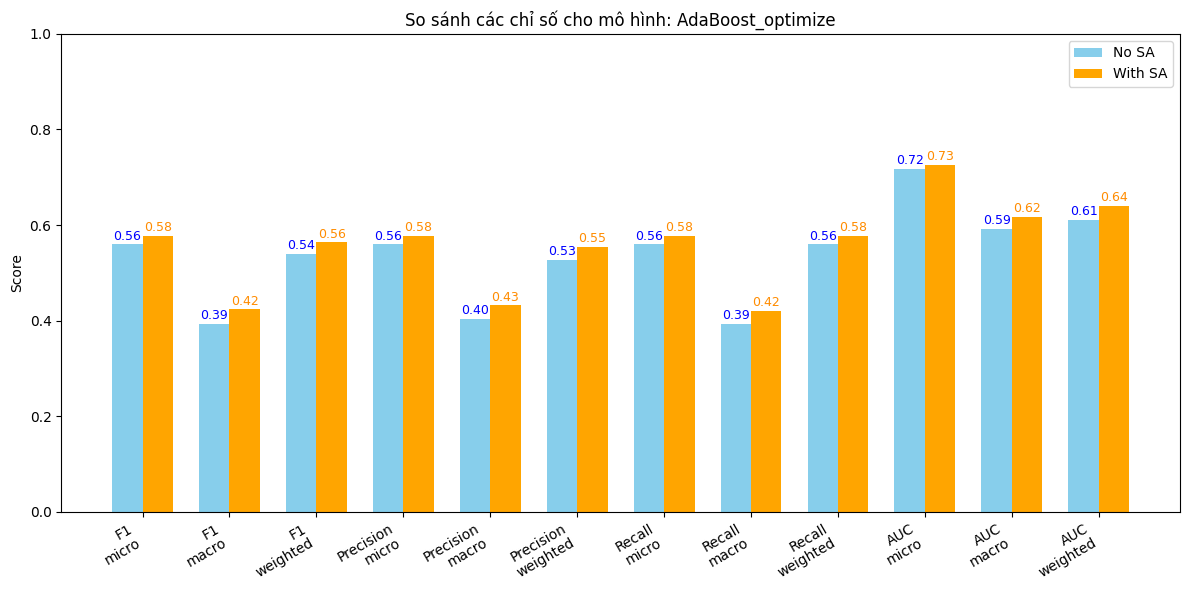

In [60]:
metrics_dict = {
    "F1": (f1_micro_scores_no_sa, f1_macro_scores_no_sa, f1_weighted_scores_no_sa,
           f1_micro_scores_with_sa, f1_macro_scores_with_sa, f1_weighted_scores_with_sa),
    "Precision": (precision_micro_scores_no_sa, precision_macro_scores_no_sa, precision_weighted_scores_no_sa,
                  precision_micro_scores_with_sa, precision_macro_scores_with_sa, precision_weighted_scores_with_sa),
    "Recall": (recall_micro_scores_no_sa, recall_macro_scores_no_sa, recall_weighted_scores_no_sa,
               recall_micro_scores_with_sa, recall_macro_scores_with_sa, recall_weighted_scores_with_sa),
    "AUC": (auc_micro_scores_no_sa, auc_macro_scores_no_sa, auc_weighted_scores_no_sa,
            auc_micro_scores_with_sa, auc_macro_scores_with_sa, auc_weighted_scores_with_sa),
}

score_types = ["micro", "macro", "weighted"]

for idx, model_name in enumerate(model_names):
    fig, ax = plt.subplots(figsize=(12, 6))
    n_metrics = len(metrics_dict)
    n_types = len(score_types)
    total_bars = n_metrics * n_types

    bar_width = 0.35
    x = np.arange(total_bars)

    values_no_sa = []
    values_with_sa = []
    xtick_labels = []

    # Gom dữ liệu và nhãn
    for metric, scores in metrics_dict.items():
        for i, st in enumerate(score_types):
            values_no_sa.append(scores[i][idx])
            values_with_sa.append(scores[i+3][idx])
            xtick_labels.append(f"{metric}\n{st}")

    # Vẽ cột
    bars1 = ax.bar(x - bar_width/2, values_no_sa, bar_width, label='No SA', color='skyblue')
    bars2 = ax.bar(x + bar_width/2, values_with_sa, bar_width, label='With SA', color='orange')

    # Annotate
    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width()/2, height+0.01), ha='center', color='blue', fontsize=9)
    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width()/2, height+0.01), ha='center', color='darkorange', fontsize=9)

    ax.set_xticks(x)
    ax.set_xticklabels(xtick_labels, rotation=30, ha='right')
    ax.set_ylim(0, 1)
    ax.set_ylabel('Score')
    ax.set_title(f"So sánh các chỉ số cho mô hình: {model_name}")
    ax.legend()
    plt.tight_layout()
    plt.show()

EXPLAIN FEATURES FOR STOCK TREND PREDICTION

In [16]:
# Chọn X_train_with_sa, y_train nếu muốn giải thích mô hình có SA
model = XGBClassifier(
    n_jobs=-1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=1089,
    max_depth=8,
    learning_rate=0.010501883895575981,
    subsample=0.9005472962597326,
    colsample_bytree=0.22675172202304014
)
model.fit(X_train_with_sa_scaled, y_train)

[09:28:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.22675172202304014, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.010501883895575981,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1089, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

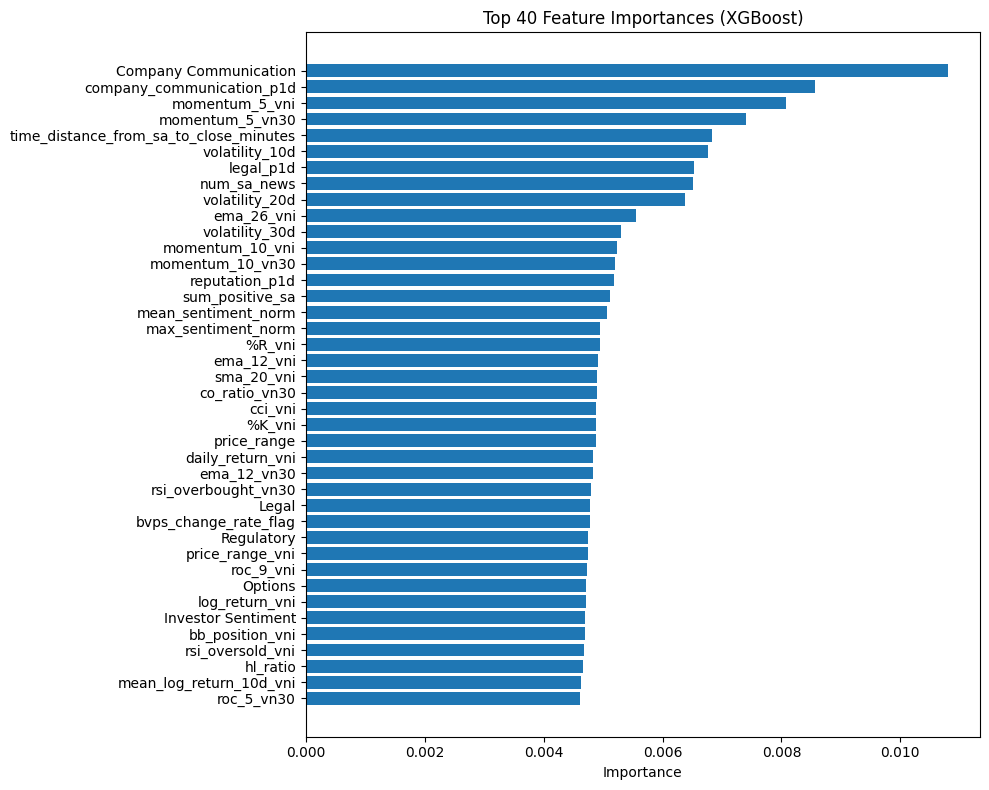

In [18]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train_with_sa.columns if isinstance(X_train_with_sa, pd.DataFrame) else features

plt.figure(figsize=(10, 8))
plt.title("Top 40 Feature Importances (XGBoost)")
plt.barh(range(40), importances[indices][:40][::-1], align="center")
plt.yticks(range(40), [feature_names[i] for i in indices][:40][::-1])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

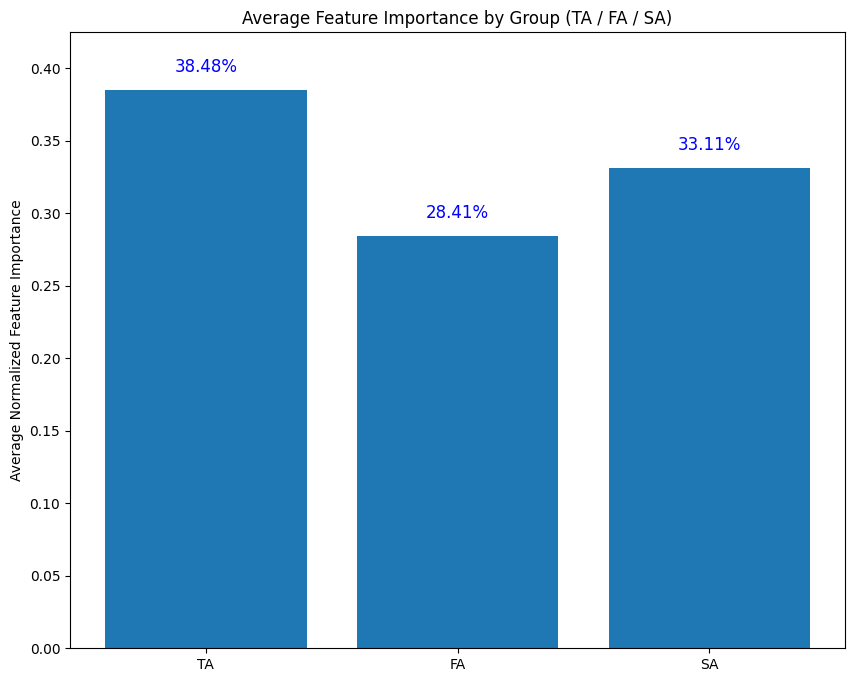

In [19]:
# Tạo mask cho từng nhóm
ta_mask = [f in ta_features for f in feature_names]
fa_mask = [f in fa_features for f in feature_names]
sa_mask = [f in sentiment_feature_selected for f in feature_names]

group_importance = {
    "TA": np.mean(importances[ta_mask]),
    "FA": np.mean(importances[fa_mask]),
    "SA": np.mean(importances[sa_mask])
}
plt.figure(figsize=(10, 8))  # hoặc (10, 8) tùy ý
total = sum(group_importance.values())
group_importance_norm = {k: v/total for k, v in group_importance.items()}
plt.bar(group_importance_norm.keys(), group_importance_norm.values())
plt.ylabel("Average Normalized Feature Importance")
plt.title("Average Feature Importance by Group (TA / FA / SA)")
for i, (k, v) in enumerate(group_importance_norm.items()):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', va='bottom', fontsize=12, color='blue')
plt.ylim(0, max(group_importance_norm.values()) + 0.04)  # Đặt trục tung cao hơn để số nằm trong cột
plt.show()

In [13]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_with_sa_scaled)



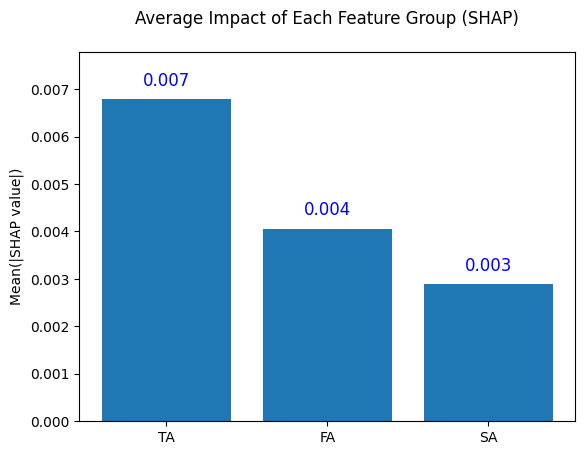

In [32]:
# Tổng hợp theo nhóm
def group_shap(shap_values, feature_names, ta_features, fa_features, sa_features):
    ta_idx = [i for i, f in enumerate(feature_names) if f in ta_features]
    fa_idx = [i for i, f in enumerate(feature_names) if f in fa_features]
    sa_idx = [i for i, f in enumerate(feature_names) if f in sa_features]
    ta_shap = np.abs(shap_values[:, ta_idx]).mean()
    fa_shap = np.abs(shap_values[:, fa_idx]).mean()
    sa_shap = np.abs(shap_values[:, sa_idx]).mean()
    return ta_shap, fa_shap, sa_shap

ta_shap, fa_shap, sa_shap = group_shap(shap_values, feature_names, ta_features, fa_features, sentiment_feature_selected)
plt.bar(["TA", "FA", "SA"], [ta_shap, fa_shap, sa_shap])
plt.ylabel("Mean(|SHAP value|)")
plt.title("Average Impact of Each Feature Group (SHAP)", pad=20)  # pad tăng khoảng cách tiêu đề
for i, v in enumerate([ta_shap, fa_shap, sa_shap]):
    plt.text(i, v + 0.0002, f"{v:.3f}", ha='center', va='bottom', fontsize=12, color='blue')
values = [ta_shap, fa_shap, sa_shap]  # Thêm dòng này
plt.ylim(0, max(values) + 0.001)  # Đặt trục tung cao hơn giá trị lớn nhất
plt.show()

In [14]:
# Đổi shape từ (n_sample, n_feature, n_class) -> (n_class, n_sample, n_feature)
shap_values_transposed = np.transpose(shap_values, (2, 0, 1))  # shape: (3, 35865, 282)

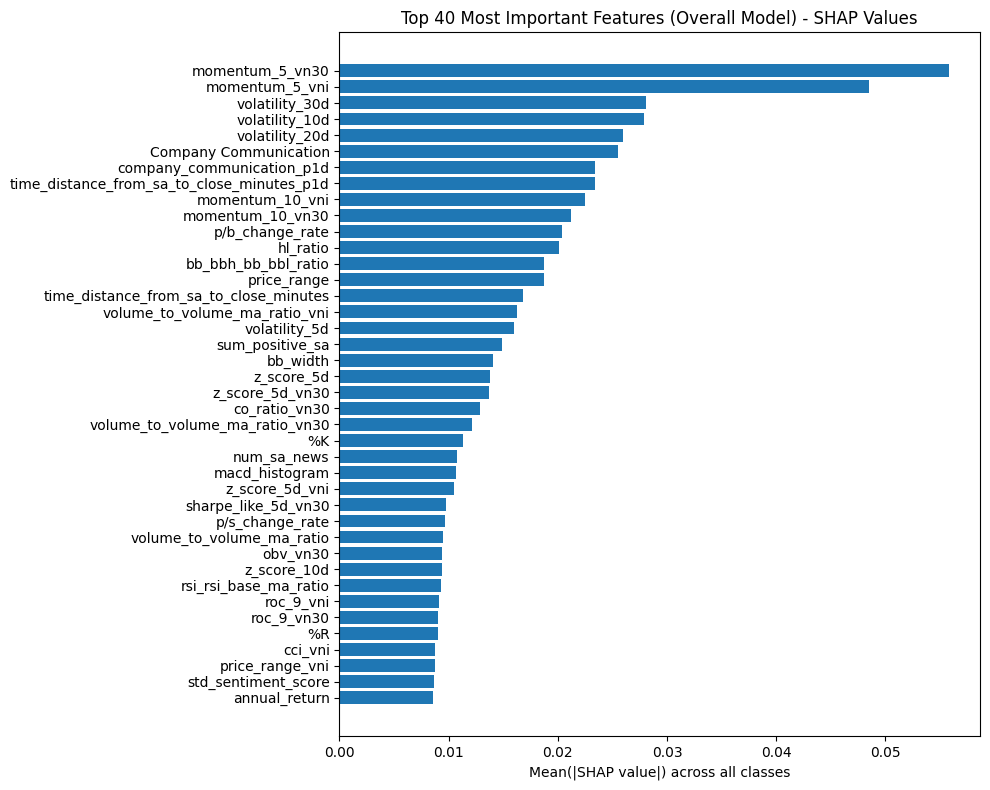

In [27]:
# Nếu shap_values_transposed có shape (n_class, n_sample, n_feature)
mean_shap = np.mean(np.abs(shap_values_transposed), axis=0)  # shape: (n_sample, n_feature)

# Sau đó lấy trung bình theo sample để ra importance cho từng feature
feature_importance = np.mean(mean_shap, axis=0)  # shape: (n_feature,)

# Vẽ top 40 feature
indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 8))
plt.barh(range(40), feature_importance[indices][:40][::-1], align="center")
plt.yticks(range(40), [feature_names[i] for i in indices][:40][::-1])
plt.xlabel("Mean(|SHAP value|) across all classes")
plt.title("Top 40 Most Important Features (Overall Model) - SHAP Values")
plt.tight_layout()
plt.show()

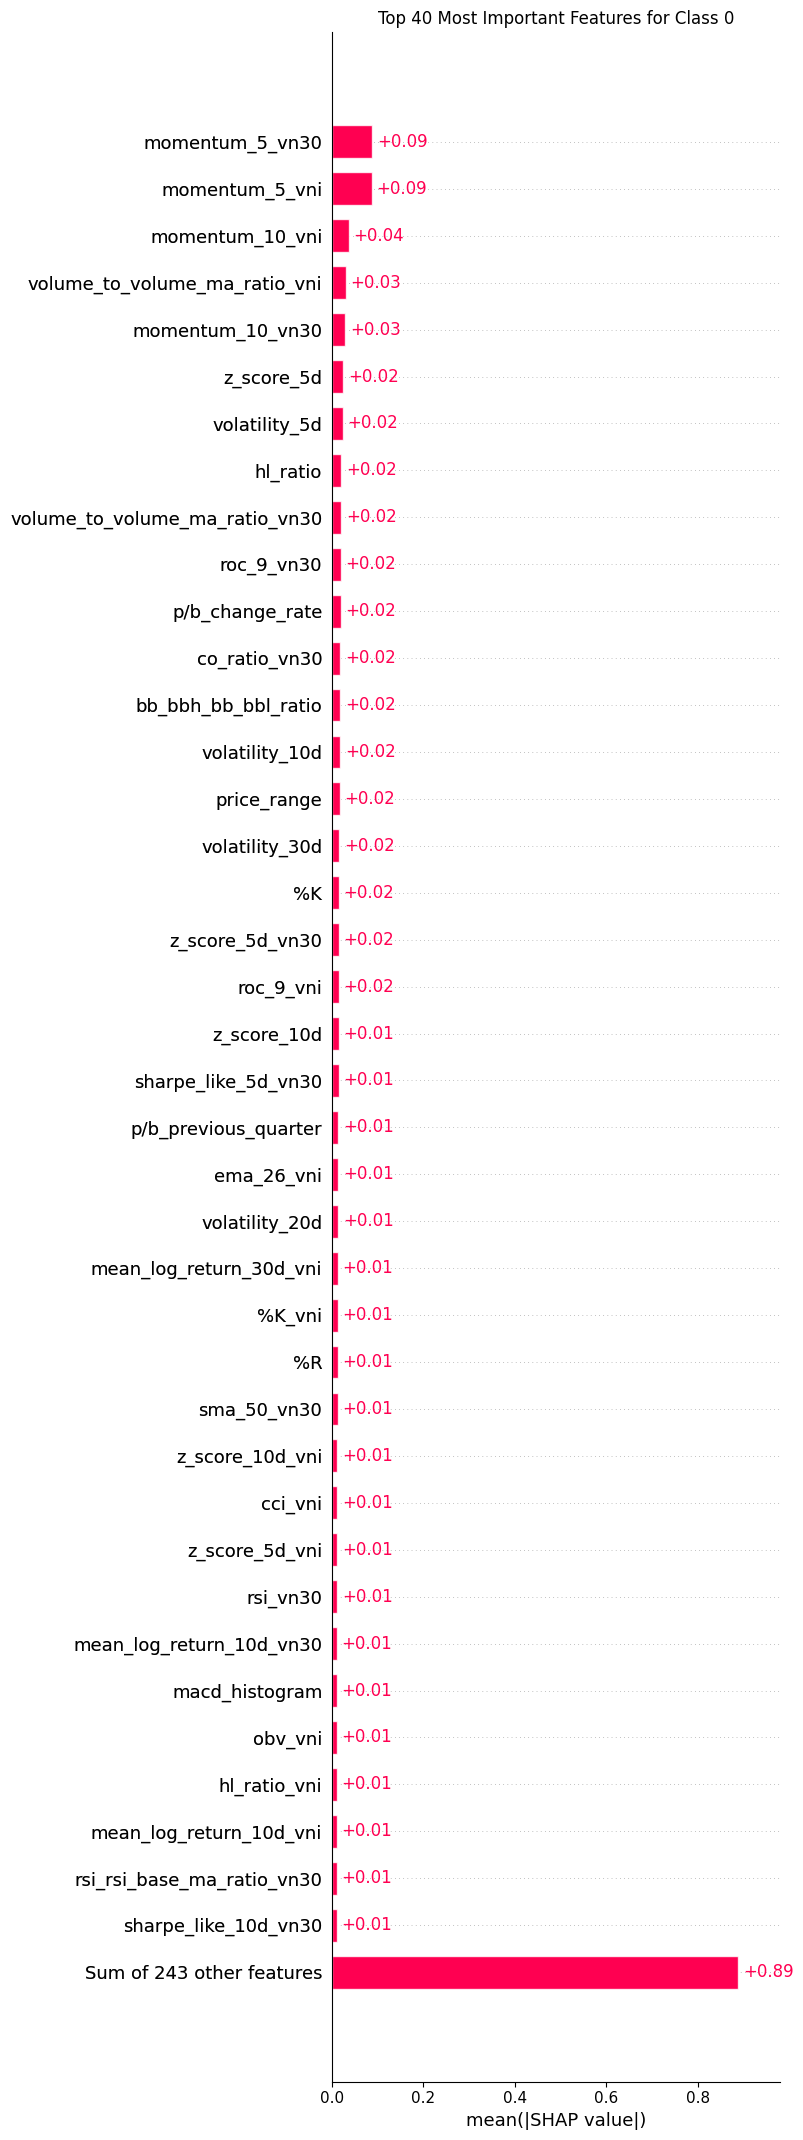

In [19]:
explanation = shap.Explanation(
    values=shap_values_transposed[0],
    base_values=explainer.expected_value[0],
    data=X_train_with_sa_scaled,
    feature_names=feature_names
)
ax = shap.plots.bar(explanation, max_display=40, show=False)  # show=False để tự đặt tiêu đề
plt.title("Top 40 Most Important Features for Class 0")
plt.tight_layout()
plt.show()

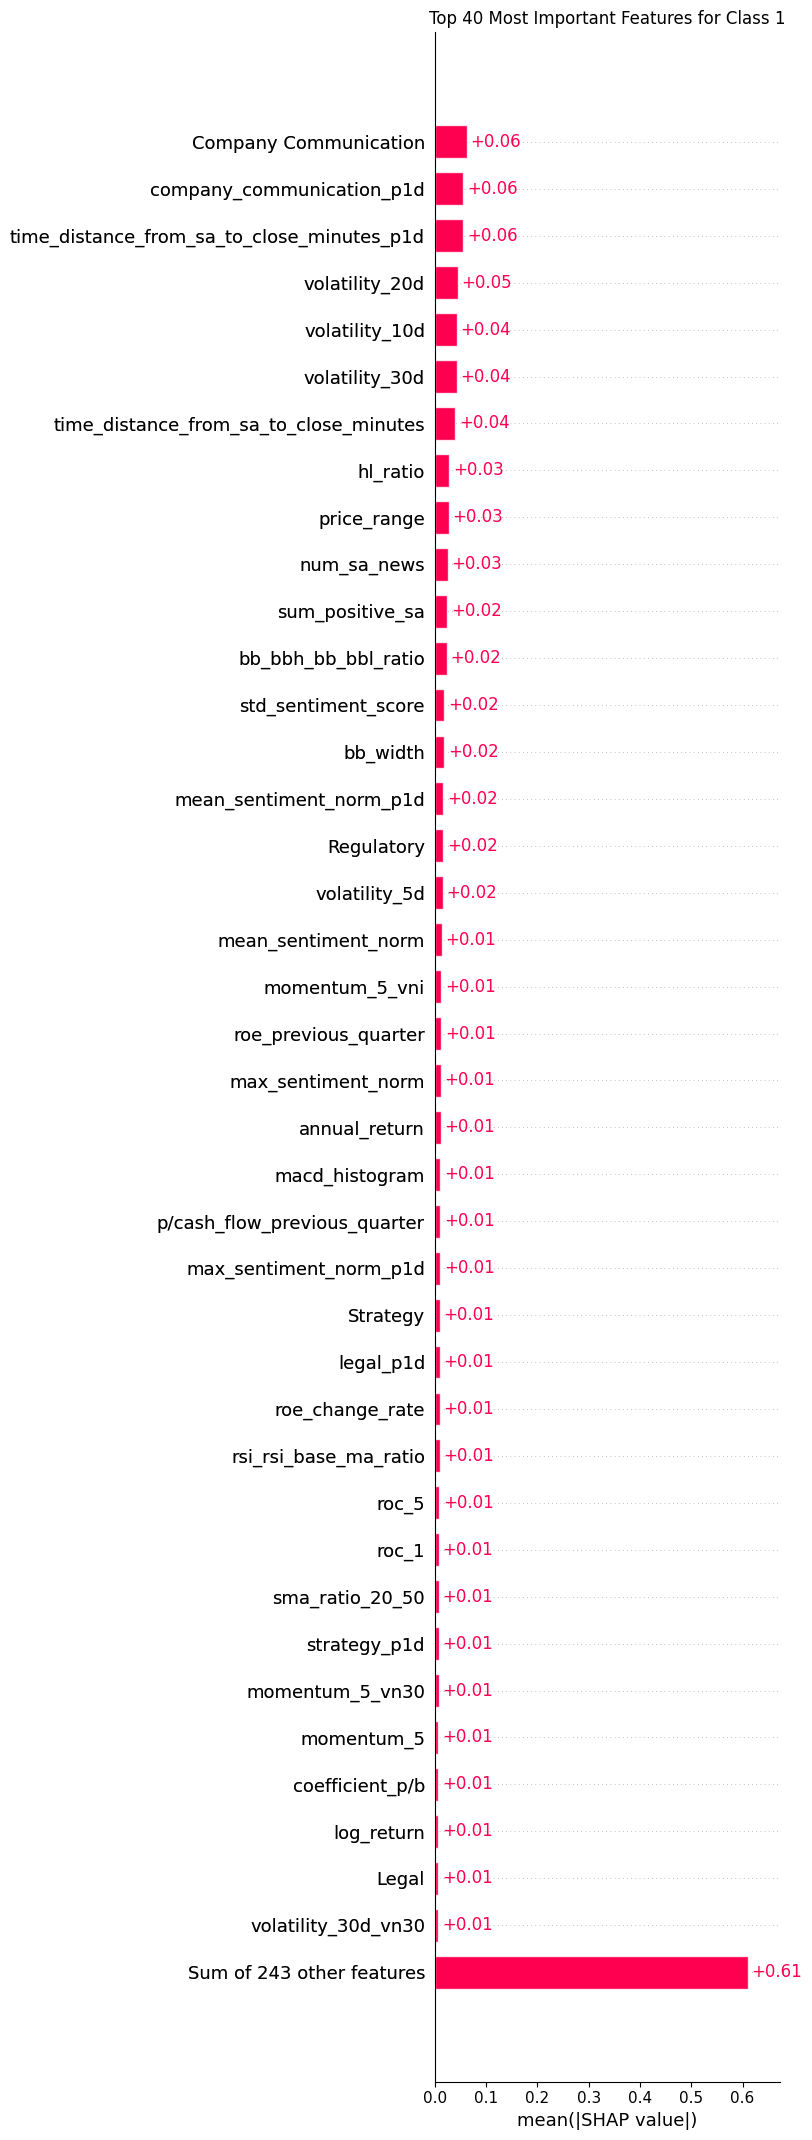

In [20]:
explanation = shap.Explanation(
    values=shap_values_transposed[1],
    base_values=explainer.expected_value[1],
    data=X_train_with_sa_scaled,
    feature_names=feature_names
)
ax = shap.plots.bar(explanation, max_display=40, show=False)  # show=False để tự đặt tiêu đề
plt.title("Top 40 Most Important Features for Class 1")
plt.tight_layout()
plt.show()

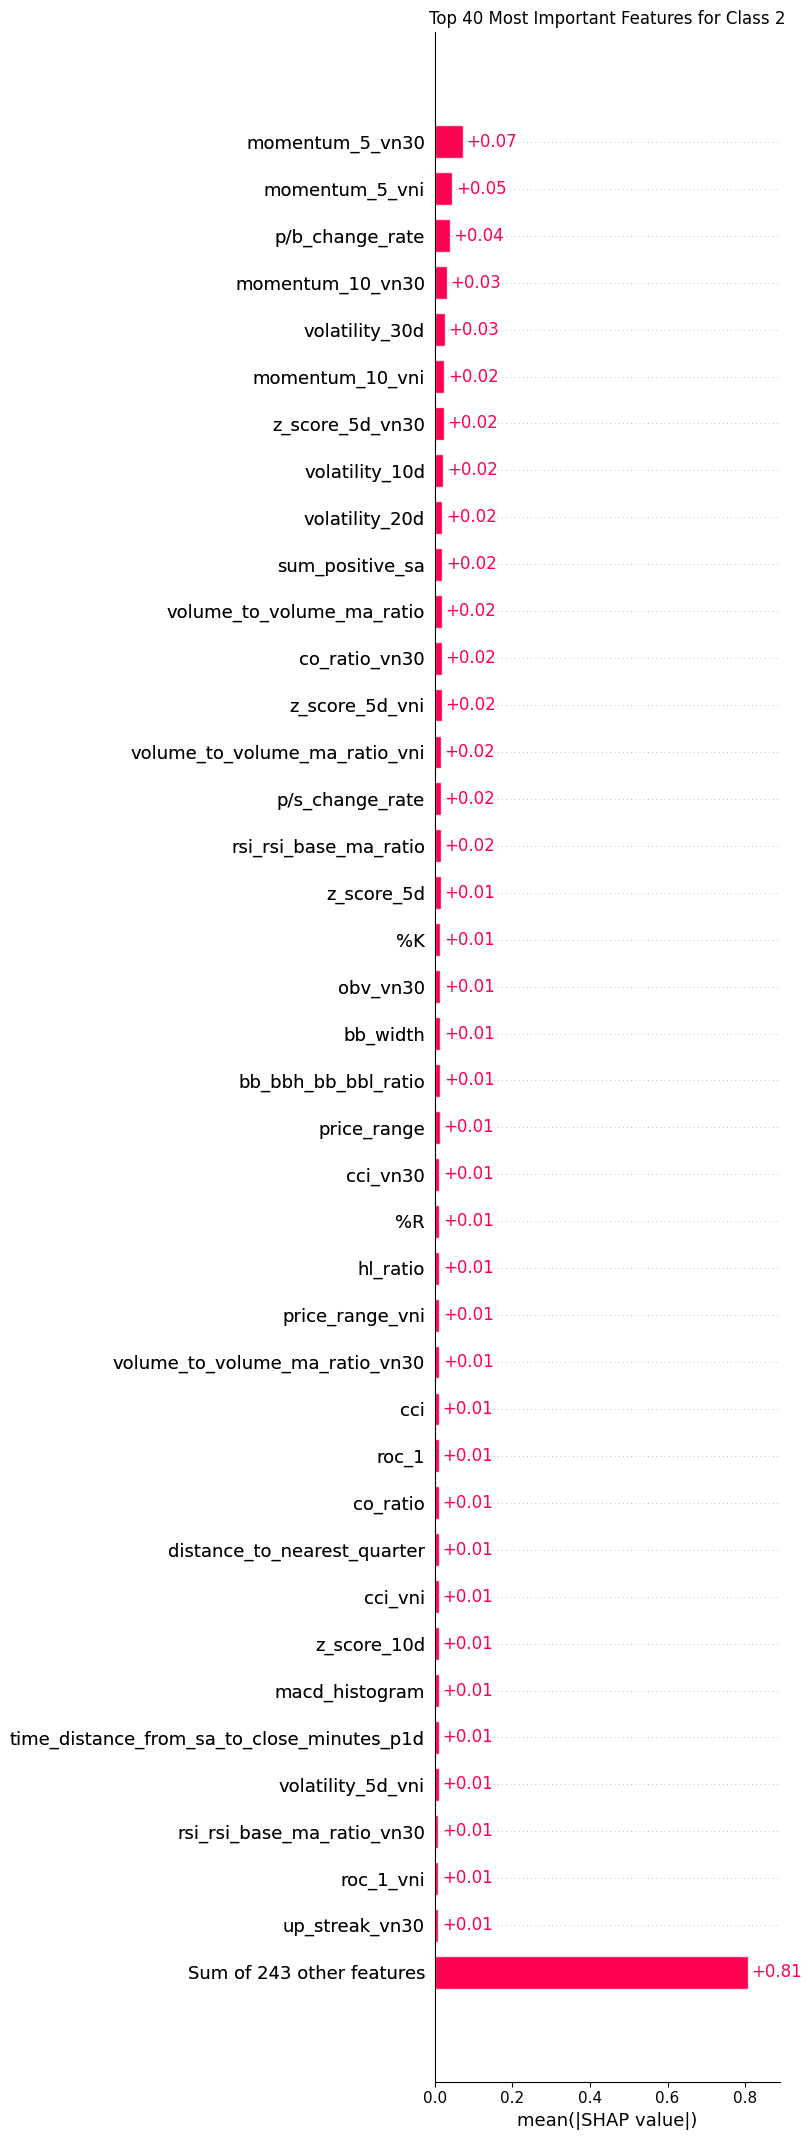

In [21]:
explanation = shap.Explanation(
    values=shap_values_transposed[2],
    base_values=explainer.expected_value[2],
    data=X_train_with_sa_scaled,
    feature_names=feature_names
)
ax = shap.plots.bar(explanation, max_display=40, show=False)  # show=False để tự đặt tiêu đề
plt.title("Top 40 Most Important Features for Class 2")
plt.tight_layout()
plt.show()